In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from collections import defaultdict
import operator
#from pycorenlp import StanfordCoreNLP
import gensim
#from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# To Plot matplotlib figures inline on the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style("whitegrid")
#sns.set_style("darkgrid")

In [2]:
bookfile = "Dune - Frank Herbert.txt"
    
with open(r'J:\InteractionMaps' + "\\" +bookfile, 'r', encoding='utf8') as myfile:
    document = myfile.readlines()    
    
len(document)

17726

In [11]:
longlines = []
startlines = []
for l in document:
    if len(l) > 8:
        longlines.append(l)
        #print(l)
        if 'by the Princess Irulan' in l:
            print(l)
            startlines.append(l)
print(len(longlines), len(startlines))

—from ‘Manual of Muad’Dib’ by the Princess Irulan

—from ‘Manual of Muad’Dib’ by the Princess Irulan

—from ‘Muad’Dib, Family Commentaries’ by the Princess Irulan

—from ‘A Child’s History of Muad’Dib’ by the Princess Irulan

—from ‘Dictionary of Muad’Dib’ by the Princess Irulan

—from ‘Muad’Dib, Family Commentaries’ by the Princess Irulan

—from Analysis: The Arrakeen Crisis’ by the Princess Irulan [private circulation: B.G. file number AR-81088587]

—from ‘A Child’s History of Muad’Dib’ by the Princess Irulan

—from ‘The Humanity of Muad’Dib’ by the Princess Irulan

—from ‘Muad’Dib: Family Commentaries’ by the Princess Irulan

—from ‘Muad’Dib: Family Commentaries’ by the Princess Irulan

—from ‘Manual of Muad’Dib’ by the Princess Irulan

—from ‘Manual of Muad’Dib’ by the Princess Irulan

—from ‘Collected Sayings of Muad’Dib’ by the Princess Irulan

—‘In My Father’s House’ by the Princess Irulan

—from ‘Collected Sayings of Muad’Dib’ by the Princess Irulan

—from ‘The Collected Saying

In [12]:
book = []
for i in range(0,len(document)):
    book += [ re.sub(r"Page \d+","",document[i].replace('\n', '')) ] #get rid of "Page ###" and returns

In [13]:
#turn whole book into a single string, if it isn't already
wholebook = ""
for line in book:
    wholebook +=  " " + line
wholebook[:500]

' DUNE      Frank Herbert      www.sfgateway.com      To the people whose labors go beyond ideas into the realm of ‘real materials’ – to the dry-land ecologists, wherever they may be, in whatever time they work, this effort at prediction is dedicated in humility and admiration.      Enter the SF Gateway …     In the last years of the twentieth century (as Wells might have put it), Gollancz, Britain’s oldest and most distinguished science fiction imprint, created the SF and Fantasy Masterworks ser'

In [14]:
#tokenize the book

# Imports
from nltk.tokenize import word_tokenize, wordpunct_tokenize, WhitespaceTokenizer

# Word Tokenize: Creates tokens from words and punctuation
word_tokens = word_tokenize(wholebook)
#print("Results of word_tokenize: {}\n".format(word_tokens))
word_tokens[0:10]

['DUNE',
 'Frank',
 'Herbert',
 'www.sfgateway.com',
 'To',
 'the',
 'people',
 'whose',
 'labors',
 'go']

In [15]:
sentences = nltk.sent_tokenize(wholebook)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    #the below can be used if the book isn't already broken into sentances, but finds a few less names
#tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in book]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
#tagged_sentences
#tokenized_sentences

In [16]:
NNP = []
for sent in tagged_sentences:
    for word,tag in sent:
        if tag == 'NNP' and word.isalpha() and len(word) > 1: NNP.append(word)  #isalpha() filters out punctuation
#NNP

In [17]:
word_freq = defaultdict(int)
for word in NNP:
    word_freq[word] += 1
#word_freq

In [57]:
from nltk.corpus import stopwords

stop = stopwords.words('english') + ["ser","lord","lady","i","ii","grand","duke","baron","emperor", "count"]
stop = stopwords.words('english') + ["yes","water","great"]

cut = 20    #14 for Alice i Wonderland, ~ 30 for the Hobbit... depends on the book
common_CapWords = {}    
for word in word_freq:
    if (word_freq[word] > cut) and word.lower() not in stop:
        #print(word,word_freq[word])
        common_CapWords[word] = word_freq[word]
#for word in bigram_freq:
#    if (bigram_freq[word] > cut/2):
#        #print(word,word_freq[word])
#        common_CapWords[word] = bigram_freq[word]
common_CapWords

print(sum(common_CapWords.values()),"Name Mentions Found")
sorted_names = sorted(common_CapWords.items(), key=operator.itemgetter(1),reverse=True)
sorted_names

11220 Name Mentions Found


[('Paul', 1690),
 ('Jessica', 891),
 ('Baron', 566),
 ('Duke', 541),
 ('Fremen', 416),
 ('Hawat', 414),
 ('Stilgar', 379),
 ('Gurney', 334),
 ('Arrakis', 303),
 ('Kynes', 263),
 ('Emperor', 259),
 ('Chani', 255),
 ('Leto', 222),
 ('Halleck', 208),
 ('Harkonnen', 200),
 ('Bene', 189),
 ('Dib', 188),
 ('Gesserit', 180),
 ('Sardaukar', 177),
 ('Muad', 168),
 ('Mother', 163),
 ('Reverend', 146),
 ('Atreides', 140),
 ('Yueh', 128),
 ('Piter', 125),
 ('Lord', 122),
 ('Idaho', 120),
 ('Jamis', 119),
 ('Harkonnens', 112),
 ('Guild', 107),
 ('Alia', 97),
 ('Count', 95),
 ('Rabban', 81),
 ('Mentat', 80),
 ('Harah', 79),
 ('Thufir', 76),
 ('Lady', 75),
 ('Imperial', 72),
 ('House', 61),
 ('Arrakeen', 56),
 ('Mapes', 56),
 ('Princess', 55),
 ('Caladan', 54),
 ('Irulan', 53),
 ('Sire', 53),
 ('Nefud', 52),
 ('Usul', 46),
 ('Duncan', 43),
 ('Fenring', 40),
 ('Fedaykin', 40),
 ('Shield', 39),
 ('Tuek', 39),
 ('Wall', 35),
 ('Majesty', 35),
 ('Dune', 34),
 ('Kwisatz', 34),
 ('Haderach', 32),
 ('Houses

# Tuning Parameter Here!  How many names to include
#top n named entities:  much of the above was included int get_characters.py and could probably be eliminated

In [60]:
#top
NamelistTuple = sorted_names[0:69]
NamelistTuple

[('Paul', 1690),
 ('Jessica', 891),
 ('Baron', 566),
 ('Duke', 541),
 ('Fremen', 416),
 ('Hawat', 414),
 ('Stilgar', 379),
 ('Gurney', 334),
 ('Arrakis', 303),
 ('Kynes', 263),
 ('Emperor', 259),
 ('Chani', 255),
 ('Leto', 222),
 ('Halleck', 208),
 ('Harkonnen', 200),
 ('Bene', 189),
 ('Dib', 188),
 ('Gesserit', 180),
 ('Sardaukar', 177),
 ('Muad', 168),
 ('Mother', 163),
 ('Reverend', 146),
 ('Atreides', 140),
 ('Yueh', 128),
 ('Piter', 125),
 ('Lord', 122),
 ('Idaho', 120),
 ('Jamis', 119),
 ('Harkonnens', 112),
 ('Guild', 107),
 ('Alia', 97),
 ('Count', 95),
 ('Rabban', 81),
 ('Mentat', 80),
 ('Harah', 79),
 ('Thufir', 76),
 ('Lady', 75),
 ('Imperial', 72),
 ('House', 61),
 ('Arrakeen', 56),
 ('Mapes', 56),
 ('Princess', 55),
 ('Caladan', 54),
 ('Irulan', 53),
 ('Sire', 53),
 ('Nefud', 52),
 ('Usul', 46),
 ('Duncan', 43),
 ('Fenring', 40),
 ('Fedaykin', 40),
 ('Shield', 39),
 ('Tuek', 39),
 ('Wall', 35),
 ('Majesty', 35),
 ('Dune', 34),
 ('Kwisatz', 34),
 ('Haderach', 32),
 ('Houses

In [61]:
Namelist = []
for n in NamelistTuple:
    Namelist.append(n[0])
Namelist    

['Paul',
 'Jessica',
 'Baron',
 'Duke',
 'Fremen',
 'Hawat',
 'Stilgar',
 'Gurney',
 'Arrakis',
 'Kynes',
 'Emperor',
 'Chani',
 'Leto',
 'Halleck',
 'Harkonnen',
 'Bene',
 'Dib',
 'Gesserit',
 'Sardaukar',
 'Muad',
 'Mother',
 'Reverend',
 'Atreides',
 'Yueh',
 'Piter',
 'Lord',
 'Idaho',
 'Jamis',
 'Harkonnens',
 'Guild',
 'Alia',
 'Count',
 'Rabban',
 'Mentat',
 'Harah',
 'Thufir',
 'Lady',
 'Imperial',
 'House',
 'Arrakeen',
 'Mapes',
 'Princess',
 'Caladan',
 'Irulan',
 'Sire',
 'Nefud',
 'Usul',
 'Duncan',
 'Fenring',
 'Fedaykin',
 'Shield',
 'Tuek',
 'Wall',
 'Majesty',
 'Dune',
 'Kwisatz',
 'Haderach',
 'Houses',
 'Imperium',
 'CHOAM',
 'Feyd',
 'Liet',
 'Lisan',
 'Bewt',
 'Padishah',
 'Landsraad',
 'Truthsayer',
 'Salusa',
 'Sayyadina']

In [62]:
# CHARACTER NAME LIST NEEDS TO BE MANUALLY CURRATED
## if pseudonyms are present, replacement and re-tokenization is required.

In [102]:
#e.g. lord of the rings - can narrow down to ones we want - but the above - I would say Usul is a good base name
Namelist_old = ['Frodo',
 'Sam',
 'Gandalf',
 'Bilbo',
 'Aragorn',
 'Pippin',
 'Merry',
 'Gollum',
 'Gimli',
 'Legolas',
# 'Shire',
 'Faramir',
 #'Orcs',
 'Saruman',
 'Boromir',
# 'Ring',
# 'Gondor',
 'Thorin',
# 'Lord',
# 'Men',
# 'Mordor',
 'Jomer',
 'Thjoden',
# 'Rohan',
 'Strider',
# 'River',
 'Elrond',
# 'Great',
# 'West',
# 'Mountain',
# 'City',

 'Treebeard',
 
 'Smjagol',
            'Sauron' #This one is a manual addition
]

In [63]:
Names = Namelist
for name in enumerate(Names): print(name)

(0, 'Paul')
(1, 'Jessica')
(2, 'Baron')
(3, 'Duke')
(4, 'Fremen')
(5, 'Hawat')
(6, 'Stilgar')
(7, 'Gurney')
(8, 'Arrakis')
(9, 'Kynes')
(10, 'Emperor')
(11, 'Chani')
(12, 'Leto')
(13, 'Halleck')
(14, 'Harkonnen')
(15, 'Bene')
(16, 'Dib')
(17, 'Gesserit')
(18, 'Sardaukar')
(19, 'Muad')
(20, 'Mother')
(21, 'Reverend')
(22, 'Atreides')
(23, 'Yueh')
(24, 'Piter')
(25, 'Lord')
(26, 'Idaho')
(27, 'Jamis')
(28, 'Harkonnens')
(29, 'Guild')
(30, 'Alia')
(31, 'Count')
(32, 'Rabban')
(33, 'Mentat')
(34, 'Harah')
(35, 'Thufir')
(36, 'Lady')
(37, 'Imperial')
(38, 'House')
(39, 'Arrakeen')
(40, 'Mapes')
(41, 'Princess')
(42, 'Caladan')
(43, 'Irulan')
(44, 'Sire')
(45, 'Nefud')
(46, 'Usul')
(47, 'Duncan')
(48, 'Fenring')
(49, 'Fedaykin')
(50, 'Shield')
(51, 'Tuek')
(52, 'Wall')
(53, 'Majesty')
(54, 'Dune')
(55, 'Kwisatz')
(56, 'Haderach')
(57, 'Houses')
(58, 'Imperium')
(59, 'CHOAM')
(60, 'Feyd')
(61, 'Liet')
(62, 'Lisan')
(63, 'Bewt')
(64, 'Padishah')
(65, 'Landsraad')
(66, 'Truthsayer')
(67, 'Salus

In [64]:
def two_char_sentences(sentence_word_tokens,name1,name2,sentence_span=3):
    sentences = sentence_word_tokens

    two_char_sent = []
    last_sentences=[""]*(sentence_span-1)
    for sentence in sentences: 
        start = ""
        for sent in last_sentences:  start += sent + " " 

        n_sentences = start + " " + sentence

        if name1 in n_sentences and name2 in n_sentences:

            two_char_sent.append(n_sentences)
        last_sentences = last_sentences[1:sentence_span-1] + [sentence]
        #print(last_sentences)
    return two_char_sent,len(two_char_sent)

In [65]:
#all, for the matrix d3 and other uses
interaction_map_all = []
done_names = []
for name1 in Namelist:
    #print("Name1:", name1)
    done_names.append(name1)
    print("Names Completed:",done_names)
    for name2 in Namelist:
        #print("Name2: ", name)
        if name2 not in done_names:
            text, num_interactions = two_char_sentences(sentences,name1,name2)
            if num_interactions>-1: 
                interaction_map_all.append([name1,name2,num_interactions])
                print("added:",[name1,name2,num_interactions])
            else: 
                print(name1,name2,num_interactions,"interactions, skipping")
            
        else: print("skipped, already did reciprocal relationship", name2)

Names Completed: ['Paul']
skipped, already did reciprocal relationship Paul
added: ['Paul', 'Jessica', 768]
added: ['Paul', 'Baron', 30]
added: ['Paul', 'Duke', 346]
added: ['Paul', 'Fremen', 354]
added: ['Paul', 'Hawat', 173]
added: ['Paul', 'Stilgar', 528]
added: ['Paul', 'Gurney', 481]
added: ['Paul', 'Arrakis', 207]
added: ['Paul', 'Kynes', 233]
added: ['Paul', 'Emperor', 194]
added: ['Paul', 'Chani', 328]
added: ['Paul', 'Leto', 71]
added: ['Paul', 'Halleck', 211]
added: ['Paul', 'Harkonnen', 249]
added: ['Paul', 'Bene', 145]
added: ['Paul', 'Dib', 279]
added: ['Paul', 'Gesserit', 140]
added: ['Paul', 'Sardaukar', 161]
added: ['Paul', 'Muad', 279]
added: ['Paul', 'Mother', 174]
added: ['Paul', 'Reverend', 137]
added: ['Paul', 'Atreides', 170]
added: ['Paul', 'Yueh', 112]
added: ['Paul', 'Piter', 4]
added: ['Paul', 'Lord', 95]
added: ['Paul', 'Idaho', 95]
added: ['Paul', 'Jamis', 160]
added: ['Paul', 'Harkonnens', 101]
added: ['Paul', 'Guild', 76]
added: ['Paul', 'Alia', 23]
added:

added: ['Duke', 'Fedaykin', 4]
added: ['Duke', 'Shield', 22]
added: ['Duke', 'Tuek', 14]
added: ['Duke', 'Wall', 23]
added: ['Duke', 'Majesty', 15]
added: ['Duke', 'Dune', 14]
added: ['Duke', 'Kwisatz', 5]
added: ['Duke', 'Haderach', 5]
added: ['Duke', 'Houses', 27]
added: ['Duke', 'Imperium', 20]
added: ['Duke', 'CHOAM', 15]
added: ['Duke', 'Feyd', 13]
added: ['Duke', 'Liet', 8]
added: ['Duke', 'Lisan', 13]
added: ['Duke', 'Bewt', 14]
added: ['Duke', 'Padishah', 22]
added: ['Duke', 'Landsraad', 8]
added: ['Duke', 'Truthsayer', 4]
added: ['Duke', 'Salusa', 6]
added: ['Duke', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
added: ['Fremen', 'Hawat', 223]
added: ['Fremen', 'Stilgar', 98]
added: ['Fremen',

added: ['Gurney', 'Kynes', 17]
added: ['Gurney', 'Emperor', 32]
added: ['Gurney', 'Chani', 33]
added: ['Gurney', 'Leto', 28]
added: ['Gurney', 'Halleck', 218]
added: ['Gurney', 'Harkonnen', 75]
added: ['Gurney', 'Bene', 11]
added: ['Gurney', 'Dib', 42]
added: ['Gurney', 'Gesserit', 9]
added: ['Gurney', 'Sardaukar', 50]
added: ['Gurney', 'Muad', 42]
added: ['Gurney', 'Mother', 17]
added: ['Gurney', 'Reverend', 11]
added: ['Gurney', 'Atreides', 43]
added: ['Gurney', 'Yueh', 16]
added: ['Gurney', 'Piter', 3]
added: ['Gurney', 'Lord', 79]
added: ['Gurney', 'Idaho', 15]
added: ['Gurney', 'Jamis', 8]
added: ['Gurney', 'Harkonnens', 25]
added: ['Gurney', 'Guild', 15]
added: ['Gurney', 'Alia', 3]
added: ['Gurney', 'Count', 0]
added: ['Gurney', 'Rabban', 13]
added: ['Gurney', 'Mentat', 5]
added: ['Gurney', 'Harah', 0]
added: ['Gurney', 'Thufir', 8]
added: ['Gurney', 'Lady', 10]
added: ['Gurney', 'Imperial', 12]
added: ['Gurney', 'House', 10]
added: ['Gurney', 'Arrakeen', 3]
added: ['Gurney', 'M

added: ['Emperor', 'House', 70]
added: ['Emperor', 'Arrakeen', 15]
added: ['Emperor', 'Mapes', 3]
added: ['Emperor', 'Princess', 19]
added: ['Emperor', 'Caladan', 7]
added: ['Emperor', 'Irulan', 14]
added: ['Emperor', 'Sire', 14]
added: ['Emperor', 'Nefud', 5]
added: ['Emperor', 'Usul', 1]
added: ['Emperor', 'Duncan', 5]
added: ['Emperor', 'Fenring', 51]
added: ['Emperor', 'Fedaykin', 8]
added: ['Emperor', 'Shield', 1]
added: ['Emperor', 'Tuek', 0]
added: ['Emperor', 'Wall', 1]
added: ['Emperor', 'Majesty', 62]
added: ['Emperor', 'Dune', 6]
added: ['Emperor', 'Kwisatz', 2]
added: ['Emperor', 'Haderach', 2]
added: ['Emperor', 'Houses', 39]
added: ['Emperor', 'Imperium', 18]
added: ['Emperor', 'CHOAM', 13]
added: ['Emperor', 'Feyd', 43]
added: ['Emperor', 'Liet', 3]
added: ['Emperor', 'Lisan', 1]
added: ['Emperor', 'Bewt', 0]
added: ['Emperor', 'Padishah', 78]
added: ['Emperor', 'Landsraad', 33]
added: ['Emperor', 'Truthsayer', 36]
added: ['Emperor', 'Salusa', 19]
added: ['Emperor', 'Say

added: ['Halleck', 'Liet', 2]
added: ['Halleck', 'Lisan', 2]
added: ['Halleck', 'Bewt', 4]
added: ['Halleck', 'Padishah', 6]
added: ['Halleck', 'Landsraad', 0]
added: ['Halleck', 'Truthsayer', 0]
added: ['Halleck', 'Salusa', 0]
added: ['Halleck', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
skipped, already did reciprocal relationship Hawat
skipped, already did reciprocal relationship Stilgar
skipped, already did reciprocal relationship Gurney
skipped, already did reciprocal relationship Arrakis
skipped, already did reciprocal relationship Kynes
skipped, already did reciprocal relationship Emperor
sk

added: ['Gesserit', 'Idaho', 6]
added: ['Gesserit', 'Jamis', 3]
added: ['Gesserit', 'Harkonnens', 17]
added: ['Gesserit', 'Guild', 50]
added: ['Gesserit', 'Alia', 3]
added: ['Gesserit', 'Count', 9]
added: ['Gesserit', 'Rabban', 1]
added: ['Gesserit', 'Mentat', 14]
added: ['Gesserit', 'Harah', 3]
added: ['Gesserit', 'Thufir', 17]
added: ['Gesserit', 'Lady', 38]
added: ['Gesserit', 'Imperial', 10]
added: ['Gesserit', 'House', 15]
added: ['Gesserit', 'Arrakeen', 8]
added: ['Gesserit', 'Mapes', 15]
added: ['Gesserit', 'Princess', 16]
added: ['Gesserit', 'Caladan', 4]
added: ['Gesserit', 'Irulan', 20]
added: ['Gesserit', 'Sire', 0]
added: ['Gesserit', 'Nefud', 1]
added: ['Gesserit', 'Usul', 1]
added: ['Gesserit', 'Duncan', 8]
added: ['Gesserit', 'Fenring', 5]
added: ['Gesserit', 'Fedaykin', 0]
added: ['Gesserit', 'Shield', 0]
added: ['Gesserit', 'Tuek', 2]
added: ['Gesserit', 'Wall', 7]
added: ['Gesserit', 'Majesty', 4]
added: ['Gesserit', 'Dune', 3]
added: ['Gesserit', 'Kwisatz', 25]
added

added: ['Mother', 'Jamis', 3]
added: ['Mother', 'Harkonnens', 8]
added: ['Mother', 'Guild', 13]
added: ['Mother', 'Alia', 37]
added: ['Mother', 'Count', 7]
added: ['Mother', 'Rabban', 3]
added: ['Mother', 'Mentat', 1]
added: ['Mother', 'Harah', 20]
added: ['Mother', 'Thufir', 5]
added: ['Mother', 'Lady', 14]
added: ['Mother', 'Imperial', 0]
added: ['Mother', 'House', 4]
added: ['Mother', 'Arrakeen', 2]
added: ['Mother', 'Mapes', 5]
added: ['Mother', 'Princess', 8]
added: ['Mother', 'Caladan', 8]
added: ['Mother', 'Irulan', 7]
added: ['Mother', 'Sire', 0]
added: ['Mother', 'Nefud', 0]
added: ['Mother', 'Usul', 1]
added: ['Mother', 'Duncan', 2]
added: ['Mother', 'Fenring', 8]
added: ['Mother', 'Fedaykin', 0]
added: ['Mother', 'Shield', 2]
added: ['Mother', 'Tuek', 0]
added: ['Mother', 'Wall', 9]
added: ['Mother', 'Majesty', 12]
added: ['Mother', 'Dune', 2]
added: ['Mother', 'Kwisatz', 19]
added: ['Mother', 'Haderach', 19]
added: ['Mother', 'Houses', 4]
added: ['Mother', 'Imperium', 7]
ad

added: ['Yueh', 'Alia', 0]
added: ['Yueh', 'Count', 0]
added: ['Yueh', 'Rabban', 3]
added: ['Yueh', 'Mentat', 3]
added: ['Yueh', 'Harah', 0]
added: ['Yueh', 'Thufir', 3]
added: ['Yueh', 'Lady', 15]
added: ['Yueh', 'Imperial', 12]
added: ['Yueh', 'House', 0]
added: ['Yueh', 'Arrakeen', 4]
added: ['Yueh', 'Mapes', 18]
added: ['Yueh', 'Princess', 13]
added: ['Yueh', 'Caladan', 9]
added: ['Yueh', 'Irulan', 13]
added: ['Yueh', 'Sire', 3]
added: ['Yueh', 'Nefud', 1]
added: ['Yueh', 'Usul', 0]
added: ['Yueh', 'Duncan', 7]
added: ['Yueh', 'Fenring', 0]
added: ['Yueh', 'Fedaykin', 0]
added: ['Yueh', 'Shield', 0]
added: ['Yueh', 'Tuek', 0]
added: ['Yueh', 'Wall', 0]
added: ['Yueh', 'Majesty', 3]
added: ['Yueh', 'Dune', 1]
added: ['Yueh', 'Kwisatz', 0]
added: ['Yueh', 'Haderach', 0]
added: ['Yueh', 'Houses', 0]
added: ['Yueh', 'Imperium', 0]
added: ['Yueh', 'CHOAM', 2]
added: ['Yueh', 'Feyd', 4]
added: ['Yueh', 'Liet', 0]
added: ['Yueh', 'Lisan', 0]
added: ['Yueh', 'Bewt', 0]
added: ['Yueh', 'Pad

added: ['Idaho', 'Rabban', 0]
added: ['Idaho', 'Mentat', 9]
added: ['Idaho', 'Harah', 0]
added: ['Idaho', 'Thufir', 12]
added: ['Idaho', 'Lady', 18]
added: ['Idaho', 'Imperial', 5]
added: ['Idaho', 'House', 6]
added: ['Idaho', 'Arrakeen', 1]
added: ['Idaho', 'Mapes', 11]
added: ['Idaho', 'Princess', 4]
added: ['Idaho', 'Caladan', 6]
added: ['Idaho', 'Irulan', 4]
added: ['Idaho', 'Sire', 33]
added: ['Idaho', 'Nefud', 0]
added: ['Idaho', 'Usul', 0]
added: ['Idaho', 'Duncan', 84]
added: ['Idaho', 'Fenring', 0]
added: ['Idaho', 'Fedaykin', 0]
added: ['Idaho', 'Shield', 2]
added: ['Idaho', 'Tuek', 0]
added: ['Idaho', 'Wall', 2]
added: ['Idaho', 'Majesty', 0]
added: ['Idaho', 'Dune', 0]
added: ['Idaho', 'Kwisatz', 0]
added: ['Idaho', 'Haderach', 0]
added: ['Idaho', 'Houses', 0]
added: ['Idaho', 'Imperium', 0]
added: ['Idaho', 'CHOAM', 0]
added: ['Idaho', 'Feyd', 3]
added: ['Idaho', 'Liet', 5]
added: ['Idaho', 'Lisan', 0]
added: ['Idaho', 'Bewt', 4]
added: ['Idaho', 'Padishah', 5]
added: ['Id

added: ['Guild', 'Princess', 3]
added: ['Guild', 'Caladan', 4]
added: ['Guild', 'Irulan', 3]
added: ['Guild', 'Sire', 3]
added: ['Guild', 'Nefud', 0]
added: ['Guild', 'Usul', 0]
added: ['Guild', 'Duncan', 0]
added: ['Guild', 'Fenring', 4]
added: ['Guild', 'Fedaykin', 0]
added: ['Guild', 'Shield', 0]
added: ['Guild', 'Tuek', 5]
added: ['Guild', 'Wall', 2]
added: ['Guild', 'Majesty', 7]
added: ['Guild', 'Dune', 2]
added: ['Guild', 'Kwisatz', 4]
added: ['Guild', 'Haderach', 4]
added: ['Guild', 'Houses', 18]
added: ['Guild', 'Imperium', 13]
added: ['Guild', 'CHOAM', 3]
added: ['Guild', 'Feyd', 12]
added: ['Guild', 'Liet', 3]
added: ['Guild', 'Lisan', 0]
added: ['Guild', 'Bewt', 3]
added: ['Guild', 'Padishah', 4]
added: ['Guild', 'Landsraad', 14]
added: ['Guild', 'Truthsayer', 9]
added: ['Guild', 'Salusa', 3]
added: ['Guild', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck'

added: ['Rabban', 'Arrakeen', 2]
added: ['Rabban', 'Mapes', 0]
added: ['Rabban', 'Princess', 2]
added: ['Rabban', 'Caladan', 1]
added: ['Rabban', 'Irulan', 2]
added: ['Rabban', 'Sire', 2]
added: ['Rabban', 'Nefud', 1]
added: ['Rabban', 'Usul', 0]
added: ['Rabban', 'Duncan', 0]
added: ['Rabban', 'Fenring', 1]
added: ['Rabban', 'Fedaykin', 0]
added: ['Rabban', 'Shield', 0]
added: ['Rabban', 'Tuek', 6]
added: ['Rabban', 'Wall', 0]
added: ['Rabban', 'Majesty', 5]
added: ['Rabban', 'Dune', 5]
added: ['Rabban', 'Kwisatz', 1]
added: ['Rabban', 'Haderach', 1]
added: ['Rabban', 'Houses', 6]
added: ['Rabban', 'Imperium', 2]
added: ['Rabban', 'CHOAM', 0]
added: ['Rabban', 'Feyd', 12]
added: ['Rabban', 'Liet', 0]
added: ['Rabban', 'Lisan', 1]
added: ['Rabban', 'Bewt', 0]
added: ['Rabban', 'Padishah', 1]
added: ['Rabban', 'Landsraad', 1]
added: ['Rabban', 'Truthsayer', 0]
added: ['Rabban', 'Salusa', 6]
added: ['Rabban', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen',

added: ['Thufir', 'Arrakeen', 7]
added: ['Thufir', 'Mapes', 0]
added: ['Thufir', 'Princess', 13]
added: ['Thufir', 'Caladan', 4]
added: ['Thufir', 'Irulan', 13]
added: ['Thufir', 'Sire', 18]
added: ['Thufir', 'Nefud', 2]
added: ['Thufir', 'Usul', 0]
added: ['Thufir', 'Duncan', 10]
added: ['Thufir', 'Fenring', 1]
added: ['Thufir', 'Fedaykin', 0]
added: ['Thufir', 'Shield', 0]
added: ['Thufir', 'Tuek', 2]
added: ['Thufir', 'Wall', 0]
added: ['Thufir', 'Majesty', 3]
added: ['Thufir', 'Dune', 2]
added: ['Thufir', 'Kwisatz', 0]
added: ['Thufir', 'Haderach', 0]
added: ['Thufir', 'Houses', 4]
added: ['Thufir', 'Imperium', 2]
added: ['Thufir', 'CHOAM', 3]
added: ['Thufir', 'Feyd', 12]
added: ['Thufir', 'Liet', 1]
added: ['Thufir', 'Lisan', 4]
added: ['Thufir', 'Bewt', 0]
added: ['Thufir', 'Padishah', 7]
added: ['Thufir', 'Landsraad', 2]
added: ['Thufir', 'Truthsayer', 0]
added: ['Thufir', 'Salusa', 3]
added: ['Thufir', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Frem

added: ['House', 'Duncan', 4]
added: ['House', 'Fenring', 11]
added: ['House', 'Fedaykin', 1]
added: ['House', 'Shield', 3]
added: ['House', 'Tuek', 2]
added: ['House', 'Wall', 3]
added: ['House', 'Majesty', 4]
added: ['House', 'Dune', 5]
added: ['House', 'Kwisatz', 0]
added: ['House', 'Haderach', 0]
added: ['House', 'Houses', 129]
added: ['House', 'Imperium', 25]
added: ['House', 'CHOAM', 13]
added: ['House', 'Feyd', 9]
added: ['House', 'Liet', 0]
added: ['House', 'Lisan', 0]
added: ['House', 'Bewt', 3]
added: ['House', 'Padishah', 12]
added: ['House', 'Landsraad', 30]
added: ['House', 'Truthsayer', 0]
added: ['House', 'Salusa', 14]
added: ['House', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Co

added: ['Princess', 'Wall', 6]
added: ['Princess', 'Majesty', 7]
added: ['Princess', 'Dune', 5]
added: ['Princess', 'Kwisatz', 2]
added: ['Princess', 'Haderach', 2]
added: ['Princess', 'Houses', 3]
added: ['Princess', 'Imperium', 0]
added: ['Princess', 'CHOAM', 0]
added: ['Princess', 'Feyd', 3]
added: ['Princess', 'Liet', 0]
added: ['Princess', 'Lisan', 4]
added: ['Princess', 'Bewt', 0]
added: ['Princess', 'Padishah', 6]
added: ['Princess', 'Landsraad', 3]
added: ['Princess', 'Truthsayer', 2]
added: ['Princess', 'Salusa', 0]
added: ['Princess', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', '

added: ['Sire', 'Tuek', 0]
added: ['Sire', 'Wall', 2]
added: ['Sire', 'Majesty', 2]
added: ['Sire', 'Dune', 0]
added: ['Sire', 'Kwisatz', 0]
added: ['Sire', 'Haderach', 0]
added: ['Sire', 'Houses', 3]
added: ['Sire', 'Imperium', 1]
added: ['Sire', 'CHOAM', 3]
added: ['Sire', 'Feyd', 6]
added: ['Sire', 'Liet', 7]
added: ['Sire', 'Lisan', 0]
added: ['Sire', 'Bewt', 0]
added: ['Sire', 'Padishah', 3]
added: ['Sire', 'Landsraad', 3]
added: ['Sire', 'Truthsayer', 0]
added: ['Sire', 'Salusa', 0]
added: ['Sire', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud']
skip

skipped, already did reciprocal relationship Harah
skipped, already did reciprocal relationship Thufir
skipped, already did reciprocal relationship Lady
skipped, already did reciprocal relationship Imperial
skipped, already did reciprocal relationship House
skipped, already did reciprocal relationship Arrakeen
skipped, already did reciprocal relationship Mapes
skipped, already did reciprocal relationship Princess
skipped, already did reciprocal relationship Caladan
skipped, already did reciprocal relationship Irulan
skipped, already did reciprocal relationship Sire
skipped, already did reciprocal relationship Nefud
skipped, already did reciprocal relationship Usul
skipped, already did reciprocal relationship Duncan
added: ['Duncan', 'Fenring', 0]
added: ['Duncan', 'Fedaykin', 0]
added: ['Duncan', 'Shield', 0]
added: ['Duncan', 'Tuek', 0]
added: ['Duncan', 'Wall', 0]
added: ['Duncan', 'Majesty', 0]
added: ['Duncan', 'Dune', 0]
added: ['Duncan', 'Kwisatz', 0]
added: ['Duncan', 'Haderach'

added: ['Fedaykin', 'Majesty', 0]
added: ['Fedaykin', 'Dune', 0]
added: ['Fedaykin', 'Kwisatz', 0]
added: ['Fedaykin', 'Haderach', 0]
added: ['Fedaykin', 'Houses', 0]
added: ['Fedaykin', 'Imperium', 2]
added: ['Fedaykin', 'CHOAM', 3]
added: ['Fedaykin', 'Feyd', 3]
added: ['Fedaykin', 'Liet', 2]
added: ['Fedaykin', 'Lisan', 3]
added: ['Fedaykin', 'Bewt', 0]
added: ['Fedaykin', 'Padishah', 0]
added: ['Fedaykin', 'Landsraad', 0]
added: ['Fedaykin', 'Truthsayer', 0]
added: ['Fedaykin', 'Salusa', 0]
added: ['Fedaykin', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Ne

skipped, already did reciprocal relationship Alia
skipped, already did reciprocal relationship Count
skipped, already did reciprocal relationship Rabban
skipped, already did reciprocal relationship Mentat
skipped, already did reciprocal relationship Harah
skipped, already did reciprocal relationship Thufir
skipped, already did reciprocal relationship Lady
skipped, already did reciprocal relationship Imperial
skipped, already did reciprocal relationship House
skipped, already did reciprocal relationship Arrakeen
skipped, already did reciprocal relationship Mapes
skipped, already did reciprocal relationship Princess
skipped, already did reciprocal relationship Caladan
skipped, already did reciprocal relationship Irulan
skipped, already did reciprocal relationship Sire
skipped, already did reciprocal relationship Nefud
skipped, already did reciprocal relationship Usul
skipped, already did reciprocal relationship Duncan
skipped, already did reciprocal relationship Fenring
skipped, already 

added: ['Dune', 'Truthsayer', 0]
added: ['Dune', 'Salusa', 0]
added: ['Dune', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud', 'Usul', 'Duncan', 'Fenring', 'Fedaykin', 'Shield', 'Tuek', 'Wall', 'Majesty', 'Dune', 'Kwisatz']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
skipped, already did reciprocal relationship Hawat
skipped, already did reciprocal 

skipped, already did reciprocal relationship Nefud
skipped, already did reciprocal relationship Usul
skipped, already did reciprocal relationship Duncan
skipped, already did reciprocal relationship Fenring
skipped, already did reciprocal relationship Fedaykin
skipped, already did reciprocal relationship Shield
skipped, already did reciprocal relationship Tuek
skipped, already did reciprocal relationship Wall
skipped, already did reciprocal relationship Majesty
skipped, already did reciprocal relationship Dune
skipped, already did reciprocal relationship Kwisatz
skipped, already did reciprocal relationship Haderach
skipped, already did reciprocal relationship Houses
added: ['Houses', 'Imperium', 20]
added: ['Houses', 'CHOAM', 8]
added: ['Houses', 'Feyd', 0]
added: ['Houses', 'Liet', 0]
added: ['Houses', 'Lisan', 0]
added: ['Houses', 'Bewt', 0]
added: ['Houses', 'Padishah', 5]
added: ['Houses', 'Landsraad', 22]
added: ['Houses', 'Truthsayer', 0]
added: ['Houses', 'Salusa', 4]
added: ['Ho

added: ['CHOAM', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud', 'Usul', 'Duncan', 'Fenring', 'Fedaykin', 'Shield', 'Tuek', 'Wall', 'Majesty', 'Dune', 'Kwisatz', 'Haderach', 'Houses', 'Imperium', 'CHOAM', 'Feyd']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
skipped, already did reciprocal relationship Hawat
skipped, already did reciprocal relationsh

added: ['Bewt', 'Sayyadina', 0]
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud', 'Usul', 'Duncan', 'Fenring', 'Fedaykin', 'Shield', 'Tuek', 'Wall', 'Majesty', 'Dune', 'Kwisatz', 'Haderach', 'Houses', 'Imperium', 'CHOAM', 'Feyd', 'Liet', 'Lisan', 'Bewt', 'Padishah']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
skipped, already did reciprocal relationship Hawat
skippe

In [66]:
#only the strongest, for the d3 web map
interaction_map = []
done_names = []
for name1 in Namelist:
    done_names.append(name1)
    print("Names Completed:",done_names)
    for name2 in Namelist:
        if name2 not in done_names:
            text, num_interactions = two_char_sentences(sentences,name1,name2)
            if num_interactions>50: 
                interaction_map.append([name1,name2,num_interactions])
                print("added:",[name1,name2,num_interactions])
            else: 
                print(name1,name2,num_interactions,"interactions, skipping")
            
        else: print("skipped, already did reciprocal relationship", name2)

Names Completed: ['Paul']
skipped, already did reciprocal relationship Paul
added: ['Paul', 'Jessica', 768]
Paul Baron 30 interactions, skipping
added: ['Paul', 'Duke', 346]
added: ['Paul', 'Fremen', 354]
added: ['Paul', 'Hawat', 173]
added: ['Paul', 'Stilgar', 528]
added: ['Paul', 'Gurney', 481]
added: ['Paul', 'Arrakis', 207]
added: ['Paul', 'Kynes', 233]
added: ['Paul', 'Emperor', 194]
added: ['Paul', 'Chani', 328]
added: ['Paul', 'Leto', 71]
added: ['Paul', 'Halleck', 211]
added: ['Paul', 'Harkonnen', 249]
added: ['Paul', 'Bene', 145]
added: ['Paul', 'Dib', 279]
added: ['Paul', 'Gesserit', 140]
added: ['Paul', 'Sardaukar', 161]
added: ['Paul', 'Muad', 279]
added: ['Paul', 'Mother', 174]
added: ['Paul', 'Reverend', 137]
added: ['Paul', 'Atreides', 170]
added: ['Paul', 'Yueh', 112]
Paul Piter 4 interactions, skipping
added: ['Paul', 'Lord', 95]
added: ['Paul', 'Idaho', 95]
added: ['Paul', 'Jamis', 160]
added: ['Paul', 'Harkonnens', 101]
added: ['Paul', 'Guild', 76]
Paul Alia 23 inter

added: ['Duke', 'Piter', 60]
added: ['Duke', 'Lord', 133]
added: ['Duke', 'Idaho', 62]
Duke Jamis 1 interactions, skipping
added: ['Duke', 'Harkonnens', 60]
Duke Guild 35 interactions, skipping
Duke Alia 7 interactions, skipping
Duke Count 15 interactions, skipping
Duke Rabban 13 interactions, skipping
Duke Mentat 47 interactions, skipping
Duke Harah 0 interactions, skipping
added: ['Duke', 'Thufir', 78]
Duke Lady 43 interactions, skipping
Duke Imperial 25 interactions, skipping
added: ['Duke', 'House', 57]
Duke Arrakeen 33 interactions, skipping
Duke Mapes 21 interactions, skipping
Duke Princess 32 interactions, skipping
Duke Caladan 34 interactions, skipping
Duke Irulan 31 interactions, skipping
added: ['Duke', 'Sire', 64]
Duke Nefud 9 interactions, skipping
Duke Usul 2 interactions, skipping
Duke Duncan 28 interactions, skipping
Duke Fenring 9 interactions, skipping
Duke Fedaykin 4 interactions, skipping
Duke Shield 22 interactions, skipping
Duke Tuek 14 interactions, skipping
Duke 

Stilgar Alia 1 interactions, skipping
Stilgar Count 0 interactions, skipping
Stilgar Rabban 9 interactions, skipping
Stilgar Mentat 1 interactions, skipping
Stilgar Harah 18 interactions, skipping
Stilgar Thufir 0 interactions, skipping
Stilgar Lady 0 interactions, skipping
Stilgar Imperial 5 interactions, skipping
Stilgar House 1 interactions, skipping
Stilgar Arrakeen 10 interactions, skipping
Stilgar Mapes 4 interactions, skipping
Stilgar Princess 14 interactions, skipping
Stilgar Caladan 2 interactions, skipping
Stilgar Irulan 14 interactions, skipping
Stilgar Sire 5 interactions, skipping
Stilgar Nefud 0 interactions, skipping
added: ['Stilgar', 'Usul', 52]
Stilgar Duncan 6 interactions, skipping
Stilgar Fenring 0 interactions, skipping
Stilgar Fedaykin 26 interactions, skipping
Stilgar Shield 10 interactions, skipping
Stilgar Tuek 0 interactions, skipping
Stilgar Wall 12 interactions, skipping
Stilgar Majesty 2 interactions, skipping
Stilgar Dune 0 interactions, skipping
Stilgar 

Kynes Gesserit 5 interactions, skipping
Kynes Sardaukar 19 interactions, skipping
Kynes Muad 2 interactions, skipping
Kynes Mother 6 interactions, skipping
Kynes Reverend 3 interactions, skipping
Kynes Atreides 32 interactions, skipping
Kynes Yueh 4 interactions, skipping
Kynes Piter 2 interactions, skipping
added: ['Kynes', 'Lord', 76]
Kynes Idaho 18 interactions, skipping
Kynes Jamis 0 interactions, skipping
Kynes Harkonnens 30 interactions, skipping
Kynes Guild 10 interactions, skipping
Kynes Alia 0 interactions, skipping
Kynes Count 3 interactions, skipping
Kynes Rabban 6 interactions, skipping
Kynes Mentat 6 interactions, skipping
Kynes Harah 0 interactions, skipping
Kynes Thufir 0 interactions, skipping
Kynes Lady 10 interactions, skipping
Kynes Imperial 40 interactions, skipping
Kynes House 14 interactions, skipping
Kynes Arrakeen 7 interactions, skipping
Kynes Mapes 0 interactions, skipping
Kynes Princess 3 interactions, skipping
Kynes Caladan 0 interactions, skipping
Kynes Iru

Leto Dib 28 interactions, skipping
Leto Gesserit 18 interactions, skipping
Leto Sardaukar 14 interactions, skipping
Leto Muad 28 interactions, skipping
Leto Mother 6 interactions, skipping
Leto Reverend 6 interactions, skipping
added: ['Leto', 'Atreides', 85]
added: ['Leto', 'Yueh', 59]
Leto Piter 29 interactions, skipping
Leto Lord 47 interactions, skipping
Leto Idaho 39 interactions, skipping
Leto Jamis 3 interactions, skipping
Leto Harkonnens 41 interactions, skipping
Leto Guild 13 interactions, skipping
Leto Alia 15 interactions, skipping
Leto Count 11 interactions, skipping
Leto Rabban 4 interactions, skipping
Leto Mentat 14 interactions, skipping
Leto Harah 0 interactions, skipping
Leto Thufir 24 interactions, skipping
Leto Lady 29 interactions, skipping
Leto Imperial 14 interactions, skipping
Leto House 19 interactions, skipping
Leto Arrakeen 12 interactions, skipping
Leto Mapes 2 interactions, skipping
Leto Princess 15 interactions, skipping
Leto Caladan 24 interactions, skippi

skipped, already did reciprocal relationship Gurney
skipped, already did reciprocal relationship Arrakis
skipped, already did reciprocal relationship Kynes
skipped, already did reciprocal relationship Emperor
skipped, already did reciprocal relationship Chani
skipped, already did reciprocal relationship Leto
skipped, already did reciprocal relationship Halleck
skipped, already did reciprocal relationship Harkonnen
skipped, already did reciprocal relationship Bene
Bene Dib 37 interactions, skipping
added: ['Bene', 'Gesserit', 506]
Bene Sardaukar 4 interactions, skipping
Bene Muad 38 interactions, skipping
added: ['Bene', 'Mother', 53]
Bene Reverend 47 interactions, skipping
Bene Atreides 37 interactions, skipping
Bene Yueh 3 interactions, skipping
Bene Piter 10 interactions, skipping
Bene Lord 5 interactions, skipping
Bene Idaho 6 interactions, skipping
Bene Jamis 3 interactions, skipping
Bene Harkonnens 17 interactions, skipping
Bene Guild 50 interactions, skipping
Bene Alia 3 interact

Gesserit Landsraad 6 interactions, skipping
Gesserit Truthsayer 15 interactions, skipping
Gesserit Salusa 1 interactions, skipping
Gesserit Sayyadina 6 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
skipped, already did reciprocal relationship Hawat
skipped, already did reciprocal relationship Stilgar
skipped, already did reciprocal relationship Gurney
skipped, already did reciprocal relationship Arrakis
skipped, already did reciprocal relationship Kynes
skipped, already did reciprocal relationship Emperor
skipped, already did reciprocal relationship Chani

Mother Imperial 0 interactions, skipping
Mother House 4 interactions, skipping
Mother Arrakeen 2 interactions, skipping
Mother Mapes 5 interactions, skipping
Mother Princess 8 interactions, skipping
Mother Caladan 8 interactions, skipping
Mother Irulan 7 interactions, skipping
Mother Sire 0 interactions, skipping
Mother Nefud 0 interactions, skipping
Mother Usul 1 interactions, skipping
Mother Duncan 2 interactions, skipping
Mother Fenring 8 interactions, skipping
Mother Fedaykin 0 interactions, skipping
Mother Shield 2 interactions, skipping
Mother Tuek 0 interactions, skipping
Mother Wall 9 interactions, skipping
Mother Majesty 12 interactions, skipping
Mother Dune 2 interactions, skipping
Mother Kwisatz 19 interactions, skipping
Mother Haderach 19 interactions, skipping
Mother Houses 4 interactions, skipping
Mother Imperium 7 interactions, skipping
Mother CHOAM 3 interactions, skipping
Mother Feyd 6 interactions, skipping
Mother Liet 2 interactions, skipping
Mother Lisan 7 interacti

Yueh Lady 15 interactions, skipping
Yueh Imperial 12 interactions, skipping
Yueh House 0 interactions, skipping
Yueh Arrakeen 4 interactions, skipping
Yueh Mapes 18 interactions, skipping
Yueh Princess 13 interactions, skipping
Yueh Caladan 9 interactions, skipping
Yueh Irulan 13 interactions, skipping
Yueh Sire 3 interactions, skipping
Yueh Nefud 1 interactions, skipping
Yueh Usul 0 interactions, skipping
Yueh Duncan 7 interactions, skipping
Yueh Fenring 0 interactions, skipping
Yueh Fedaykin 0 interactions, skipping
Yueh Shield 0 interactions, skipping
Yueh Tuek 0 interactions, skipping
Yueh Wall 0 interactions, skipping
Yueh Majesty 3 interactions, skipping
Yueh Dune 1 interactions, skipping
Yueh Kwisatz 0 interactions, skipping
Yueh Haderach 0 interactions, skipping
Yueh Houses 0 interactions, skipping
Yueh Imperium 0 interactions, skipping
Yueh CHOAM 2 interactions, skipping
Yueh Feyd 4 interactions, skipping
Yueh Liet 0 interactions, skipping
Yueh Lisan 0 interactions, skipping
Y

Idaho Harah 0 interactions, skipping
Idaho Thufir 12 interactions, skipping
Idaho Lady 18 interactions, skipping
Idaho Imperial 5 interactions, skipping
Idaho House 6 interactions, skipping
Idaho Arrakeen 1 interactions, skipping
Idaho Mapes 11 interactions, skipping
Idaho Princess 4 interactions, skipping
Idaho Caladan 6 interactions, skipping
Idaho Irulan 4 interactions, skipping
Idaho Sire 33 interactions, skipping
Idaho Nefud 0 interactions, skipping
Idaho Usul 0 interactions, skipping
added: ['Idaho', 'Duncan', 84]
Idaho Fenring 0 interactions, skipping
Idaho Fedaykin 0 interactions, skipping
Idaho Shield 2 interactions, skipping
Idaho Tuek 0 interactions, skipping
Idaho Wall 2 interactions, skipping
Idaho Majesty 0 interactions, skipping
Idaho Dune 0 interactions, skipping
Idaho Kwisatz 0 interactions, skipping
Idaho Haderach 0 interactions, skipping
Idaho Houses 0 interactions, skipping
Idaho Imperium 0 interactions, skipping
Idaho CHOAM 0 interactions, skipping
Idaho Feyd 3 int

skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
skipped, already did reciprocal relationship Hawat
skipped, already did reciprocal relationship Stilgar
skipped, already did reciprocal relationship Gurney
skipped, already did reciprocal relationship Arrakis
skipped, already did reciprocal relationship Kynes
skipped, already did reciprocal relationship Emperor
skipped, already did reciprocal relationship Chani
skipped, already did reciprocal relationship Leto
skipped, already did reciprocal relationship Halleck
skipped, already did reciprocal relationship Harkonnen
skipped, already did reciprocal relationship Bene
skipped, already did reciprocal relationship Dib
skipped, already did reciprocal relationship Gesserit
skipped, already did reciprocal relationship Sardaukar
skipped, already did reciprocal relationship Muad
skipped, already did reciprocal relationship Mother
skipped, alread

Count Thufir 3 interactions, skipping
Count Lady 23 interactions, skipping
Count Imperial 12 interactions, skipping
Count House 22 interactions, skipping
Count Arrakeen 5 interactions, skipping
Count Mapes 0 interactions, skipping
Count Princess 5 interactions, skipping
Count Caladan 5 interactions, skipping
Count Irulan 5 interactions, skipping
Count Sire 0 interactions, skipping
Count Nefud 0 interactions, skipping
Count Usul 0 interactions, skipping
Count Duncan 0 interactions, skipping
added: ['Count', 'Fenring', 104]
Count Fedaykin 0 interactions, skipping
Count Shield 0 interactions, skipping
Count Tuek 2 interactions, skipping
Count Wall 0 interactions, skipping
Count Majesty 5 interactions, skipping
Count Dune 3 interactions, skipping
Count Kwisatz 3 interactions, skipping
Count Haderach 3 interactions, skipping
Count Houses 17 interactions, skipping
Count Imperium 5 interactions, skipping
Count CHOAM 1 interactions, skipping
Count Feyd 44 interactions, skipping
Count Liet 0 in

Mentat Sayyadina 0 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
skipped, already did reciprocal relationship Hawat
skipped, already did reciprocal relationship Stilgar
skipped, already did reciprocal relationship Gurney
skipped, already did reciprocal relationship Arrakis
skipped, already did reciprocal relationship Kynes
skipped, already did reciprocal relationship Emperor
skipped, already did reciproc

Lady Fenring 32 interactions, skipping
Lady Fedaykin 0 interactions, skipping
Lady Shield 0 interactions, skipping
Lady Tuek 5 interactions, skipping
Lady Wall 1 interactions, skipping
Lady Majesty 0 interactions, skipping
Lady Dune 0 interactions, skipping
Lady Kwisatz 3 interactions, skipping
Lady Haderach 3 interactions, skipping
Lady Houses 0 interactions, skipping
Lady Imperium 0 interactions, skipping
Lady CHOAM 0 interactions, skipping
Lady Feyd 25 interactions, skipping
Lady Liet 0 interactions, skipping
Lady Lisan 0 interactions, skipping
Lady Bewt 2 interactions, skipping
Lady Padishah 2 interactions, skipping
Lady Landsraad 0 interactions, skipping
Lady Truthsayer 0 interactions, skipping
Lady Salusa 0 interactions, skipping
Lady Sayyadina 0 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 

Arrakeen Tuek 0 interactions, skipping
Arrakeen Wall 14 interactions, skipping
Arrakeen Majesty 1 interactions, skipping
Arrakeen Dune 7 interactions, skipping
Arrakeen Kwisatz 2 interactions, skipping
Arrakeen Haderach 2 interactions, skipping
Arrakeen Houses 0 interactions, skipping
Arrakeen Imperium 3 interactions, skipping
Arrakeen CHOAM 3 interactions, skipping
Arrakeen Feyd 7 interactions, skipping
Arrakeen Liet 4 interactions, skipping
Arrakeen Lisan 3 interactions, skipping
Arrakeen Bewt 0 interactions, skipping
Arrakeen Padishah 4 interactions, skipping
Arrakeen Landsraad 0 interactions, skipping
Arrakeen Truthsayer 2 interactions, skipping
Arrakeen Salusa 2 interactions, skipping
Arrakeen Sayyadina 0 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', '

Caladan Usul 3 interactions, skipping
Caladan Duncan 3 interactions, skipping
Caladan Fenring 3 interactions, skipping
Caladan Fedaykin 0 interactions, skipping
Caladan Shield 2 interactions, skipping
Caladan Tuek 0 interactions, skipping
Caladan Wall 2 interactions, skipping
Caladan Majesty 0 interactions, skipping
Caladan Dune 8 interactions, skipping
Caladan Kwisatz 1 interactions, skipping
Caladan Haderach 1 interactions, skipping
Caladan Houses 0 interactions, skipping
Caladan Imperium 0 interactions, skipping
Caladan CHOAM 6 interactions, skipping
Caladan Feyd 2 interactions, skipping
Caladan Liet 0 interactions, skipping
Caladan Lisan 0 interactions, skipping
Caladan Bewt 2 interactions, skipping
Caladan Padishah 4 interactions, skipping
Caladan Landsraad 0 interactions, skipping
Caladan Truthsayer 0 interactions, skipping
Caladan Salusa 5 interactions, skipping
Caladan Sayyadina 0 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'S

Nefud Fenring 0 interactions, skipping
Nefud Fedaykin 0 interactions, skipping
Nefud Shield 0 interactions, skipping
Nefud Tuek 0 interactions, skipping
Nefud Wall 0 interactions, skipping
Nefud Majesty 1 interactions, skipping
Nefud Dune 0 interactions, skipping
Nefud Kwisatz 0 interactions, skipping
Nefud Haderach 0 interactions, skipping
Nefud Houses 0 interactions, skipping
Nefud Imperium 0 interactions, skipping
Nefud CHOAM 0 interactions, skipping
Nefud Feyd 16 interactions, skipping
Nefud Liet 0 interactions, skipping
Nefud Lisan 0 interactions, skipping
Nefud Bewt 0 interactions, skipping
Nefud Padishah 0 interactions, skipping
Nefud Landsraad 0 interactions, skipping
Nefud Truthsayer 0 interactions, skipping
Nefud Salusa 0 interactions, skipping
Nefud Sayyadina 0 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', '

Fenring CHOAM 0 interactions, skipping
Fenring Feyd 30 interactions, skipping
Fenring Liet 0 interactions, skipping
Fenring Lisan 0 interactions, skipping
Fenring Bewt 0 interactions, skipping
Fenring Padishah 6 interactions, skipping
Fenring Landsraad 3 interactions, skipping
Fenring Truthsayer 0 interactions, skipping
Fenring Salusa 6 interactions, skipping
Fenring Sayyadina 0 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud', 'Usul', 'Duncan', 'Fenring', 'Fedaykin']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal re

Tuek Haderach 0 interactions, skipping
Tuek Houses 0 interactions, skipping
Tuek Imperium 0 interactions, skipping
Tuek CHOAM 0 interactions, skipping
Tuek Feyd 0 interactions, skipping
Tuek Liet 0 interactions, skipping
Tuek Lisan 0 interactions, skipping
Tuek Bewt 7 interactions, skipping
Tuek Padishah 0 interactions, skipping
Tuek Landsraad 0 interactions, skipping
Tuek Truthsayer 0 interactions, skipping
Tuek Salusa 0 interactions, skipping
Tuek Sayyadina 0 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud', 'Usul', 'Duncan', 'Fenring', 'Fedaykin', 

Dune Landsraad 1 interactions, skipping
Dune Truthsayer 0 interactions, skipping
Dune Salusa 0 interactions, skipping
Dune Sayyadina 0 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud', 'Usul', 'Duncan', 'Fenring', 'Fedaykin', 'Shield', 'Tuek', 'Wall', 'Majesty', 'Dune', 'Kwisatz']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
skipped, already di

Houses Salusa 4 interactions, skipping
Houses Sayyadina 0 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud', 'Usul', 'Duncan', 'Fenring', 'Fedaykin', 'Shield', 'Tuek', 'Wall', 'Majesty', 'Dune', 'Kwisatz', 'Haderach', 'Houses', 'Imperium']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
skipped, already did reciprocal relationship Hawat
skipped, al

Feyd Padishah 4 interactions, skipping
Feyd Landsraad 3 interactions, skipping
Feyd Truthsayer 6 interactions, skipping
Feyd Salusa 1 interactions, skipping
Feyd Sayyadina 0 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud', 'Usul', 'Duncan', 'Fenring', 'Fedaykin', 'Shield', 'Tuek', 'Wall', 'Majesty', 'Dune', 'Kwisatz', 'Haderach', 'Houses', 'Imperium', 'CHOAM', 'Feyd', 'Liet']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did re

Lisan Landsraad 0 interactions, skipping
Lisan Truthsayer 0 interactions, skipping
Lisan Salusa 0 interactions, skipping
Lisan Sayyadina 2 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud', 'Usul', 'Duncan', 'Fenring', 'Fedaykin', 'Shield', 'Tuek', 'Wall', 'Majesty', 'Dune', 'Kwisatz', 'Haderach', 'Houses', 'Imperium', 'CHOAM', 'Feyd', 'Liet', 'Lisan', 'Bewt']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relations

Padishah Sayyadina 2 interactions, skipping
Names Completed: ['Paul', 'Jessica', 'Baron', 'Duke', 'Fremen', 'Hawat', 'Stilgar', 'Gurney', 'Arrakis', 'Kynes', 'Emperor', 'Chani', 'Leto', 'Halleck', 'Harkonnen', 'Bene', 'Dib', 'Gesserit', 'Sardaukar', 'Muad', 'Mother', 'Reverend', 'Atreides', 'Yueh', 'Piter', 'Lord', 'Idaho', 'Jamis', 'Harkonnens', 'Guild', 'Alia', 'Count', 'Rabban', 'Mentat', 'Harah', 'Thufir', 'Lady', 'Imperial', 'House', 'Arrakeen', 'Mapes', 'Princess', 'Caladan', 'Irulan', 'Sire', 'Nefud', 'Usul', 'Duncan', 'Fenring', 'Fedaykin', 'Shield', 'Tuek', 'Wall', 'Majesty', 'Dune', 'Kwisatz', 'Haderach', 'Houses', 'Imperium', 'CHOAM', 'Feyd', 'Liet', 'Lisan', 'Bewt', 'Padishah', 'Landsraad']
skipped, already did reciprocal relationship Paul
skipped, already did reciprocal relationship Jessica
skipped, already did reciprocal relationship Baron
skipped, already did reciprocal relationship Duke
skipped, already did reciprocal relationship Fremen
skipped, already did reciprocal 

In [67]:
interaction_map_all

[['Paul', 'Jessica', 768],
 ['Paul', 'Baron', 30],
 ['Paul', 'Duke', 346],
 ['Paul', 'Fremen', 354],
 ['Paul', 'Hawat', 173],
 ['Paul', 'Stilgar', 528],
 ['Paul', 'Gurney', 481],
 ['Paul', 'Arrakis', 207],
 ['Paul', 'Kynes', 233],
 ['Paul', 'Emperor', 194],
 ['Paul', 'Chani', 328],
 ['Paul', 'Leto', 71],
 ['Paul', 'Halleck', 211],
 ['Paul', 'Harkonnen', 249],
 ['Paul', 'Bene', 145],
 ['Paul', 'Dib', 279],
 ['Paul', 'Gesserit', 140],
 ['Paul', 'Sardaukar', 161],
 ['Paul', 'Muad', 279],
 ['Paul', 'Mother', 174],
 ['Paul', 'Reverend', 137],
 ['Paul', 'Atreides', 170],
 ['Paul', 'Yueh', 112],
 ['Paul', 'Piter', 4],
 ['Paul', 'Lord', 95],
 ['Paul', 'Idaho', 95],
 ['Paul', 'Jamis', 160],
 ['Paul', 'Harkonnens', 101],
 ['Paul', 'Guild', 76],
 ['Paul', 'Alia', 23],
 ['Paul', 'Count', 16],
 ['Paul', 'Rabban', 35],
 ['Paul', 'Mentat', 33],
 ['Paul', 'Harah', 39],
 ['Paul', 'Thufir', 57],
 ['Paul', 'Lady', 41],
 ['Paul', 'Imperial', 58],
 ['Paul', 'House', 56],
 ['Paul', 'Arrakeen', 60],
 ['Paul'

In [68]:
interaction_map

[['Paul', 'Jessica', 768],
 ['Paul', 'Duke', 346],
 ['Paul', 'Fremen', 354],
 ['Paul', 'Hawat', 173],
 ['Paul', 'Stilgar', 528],
 ['Paul', 'Gurney', 481],
 ['Paul', 'Arrakis', 207],
 ['Paul', 'Kynes', 233],
 ['Paul', 'Emperor', 194],
 ['Paul', 'Chani', 328],
 ['Paul', 'Leto', 71],
 ['Paul', 'Halleck', 211],
 ['Paul', 'Harkonnen', 249],
 ['Paul', 'Bene', 145],
 ['Paul', 'Dib', 279],
 ['Paul', 'Gesserit', 140],
 ['Paul', 'Sardaukar', 161],
 ['Paul', 'Muad', 279],
 ['Paul', 'Mother', 174],
 ['Paul', 'Reverend', 137],
 ['Paul', 'Atreides', 170],
 ['Paul', 'Yueh', 112],
 ['Paul', 'Lord', 95],
 ['Paul', 'Idaho', 95],
 ['Paul', 'Jamis', 160],
 ['Paul', 'Harkonnens', 101],
 ['Paul', 'Guild', 76],
 ['Paul', 'Thufir', 57],
 ['Paul', 'Imperial', 58],
 ['Paul', 'House', 56],
 ['Paul', 'Arrakeen', 60],
 ['Paul', 'Princess', 72],
 ['Paul', 'Caladan', 54],
 ['Paul', 'Irulan', 65],
 ['Paul', 'Usul', 72],
 ['Paul', 'Duncan', 57],
 ['Paul', 'Fedaykin', 94],
 ['Paul', 'Feyd', 81],
 ['Jessica', 'Baron', 6

# word2vec

In [69]:
model = gensim.models.Word2Vec(tokenized_sentences, size=300, window=7, min_count=5, workers=7,sg=1)

In [70]:
model.most_similar(positive=['woman', 'duke'], negative=['man'], topn=5)

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Even', 0.9007371664047241),
 ('love', 0.8849456310272217),
 ('witch', 0.8818730115890503),
 ('servant', 0.8756523132324219),
 ('daughter', 0.8754826784133911)]

In [71]:
model.similarity('woman','man')

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8298586

In [72]:
model.most_similar('Arrakeen')

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Dune', 0.9466045498847961),
 ('Commentaries', 0.9457074403762817),
 ('Awakening', 0.9411731958389282),
 ('On', 0.9344226121902466),
 ('Man', 0.9343479871749878),
 ('Manual', 0.9340456128120422),
 ('Universe', 0.9323087930679321),
 ('Two', 0.931929349899292),
 ('battle', 0.9301152229309082),
 ('Family', 0.9291211366653442)]

In [73]:
character_vectors = []
for name in Namelist:
    character_vectors.append(model[name])
#character_vectors

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
character_vectors_df = pd.DataFrame(character_vectors)
#get rid of any NaN's in there
character_vectors_df.fillna(0,inplace=True) 
character_vectors_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.077146,-0.287715,-0.225671,0.183846,0.122932,0.279071,-0.067124,-0.060036,0.053817,-0.158713,...,-0.299566,0.037178,-0.209474,-0.363337,-0.165475,0.025343,-0.048902,-0.052703,-0.089148,0.064445
1,0.015459,-0.274841,-0.165936,0.274282,0.099265,0.295994,0.056885,-0.041830,0.051685,-0.055403,...,-0.365886,0.016522,-0.180633,-0.443817,-0.094964,0.057401,-0.047609,-0.245345,-0.140511,0.086051
2,-0.244160,-0.118492,-0.072454,0.136519,0.241730,0.264283,-0.100762,0.092430,-0.002280,-0.080623,...,-0.342293,-0.135650,-0.249144,-0.184674,-0.143403,-0.005144,-0.283582,0.048586,-0.153758,-0.009747


In [75]:
#Standardize vectors:  IMPORTANT!! gives MUCH better results in 2d
character_vectors_df_std = (character_vectors_df-character_vectors_df.mean())/character_vectors_df.std()

### SVD down to 2D

In [76]:
SVD = TruncatedSVD(n_components=2, n_iter=10, random_state=None, tol=0.0)

In [77]:
character_vectors_2d = SVD.fit_transform(character_vectors_df_std)

In [78]:
charpoints = pd.DataFrame([
        (name, coords[0], coords[1])
        for name, coords in [
            #(name, all_word_vectors_matrix_2d[thrones2vec.vocab[word].index])
            (Namelist[i], character_vectors_2d[i])
            for i in range(len(Namelist))
        ]
    ],
    columns=["name", "x", "y"]
)
charpoints.head()

,name,x,y
0,Paul,14.571849,-2.882756
1,Jessica,16.164425,5.120370
2,Baron,11.345384,-5.198256
3,Duke,4.680088,-6.293050
4,Fremen,-4.461708,-0.683178


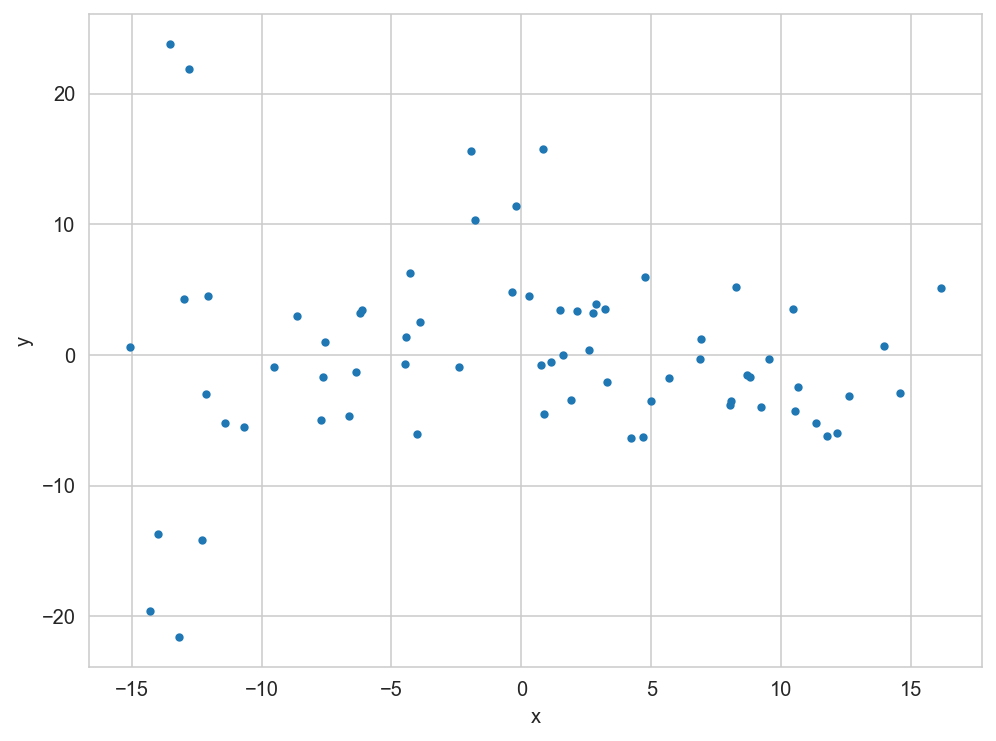

In [79]:
charpoints.plot.scatter("x", "y", s=10, figsize=(8, 6))
plt.show()

In [80]:
def plot_region(dataframe,x_bounds, y_bounds):
    slice = dataframe[
        (x_bounds[0] <= dataframe.x) &
        (dataframe.x <= x_bounds[1]) & 
        (y_bounds[0] <= dataframe.y) &
        (dataframe.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.010, point.y + 0.006, Namelist[point.name], fontsize=11)

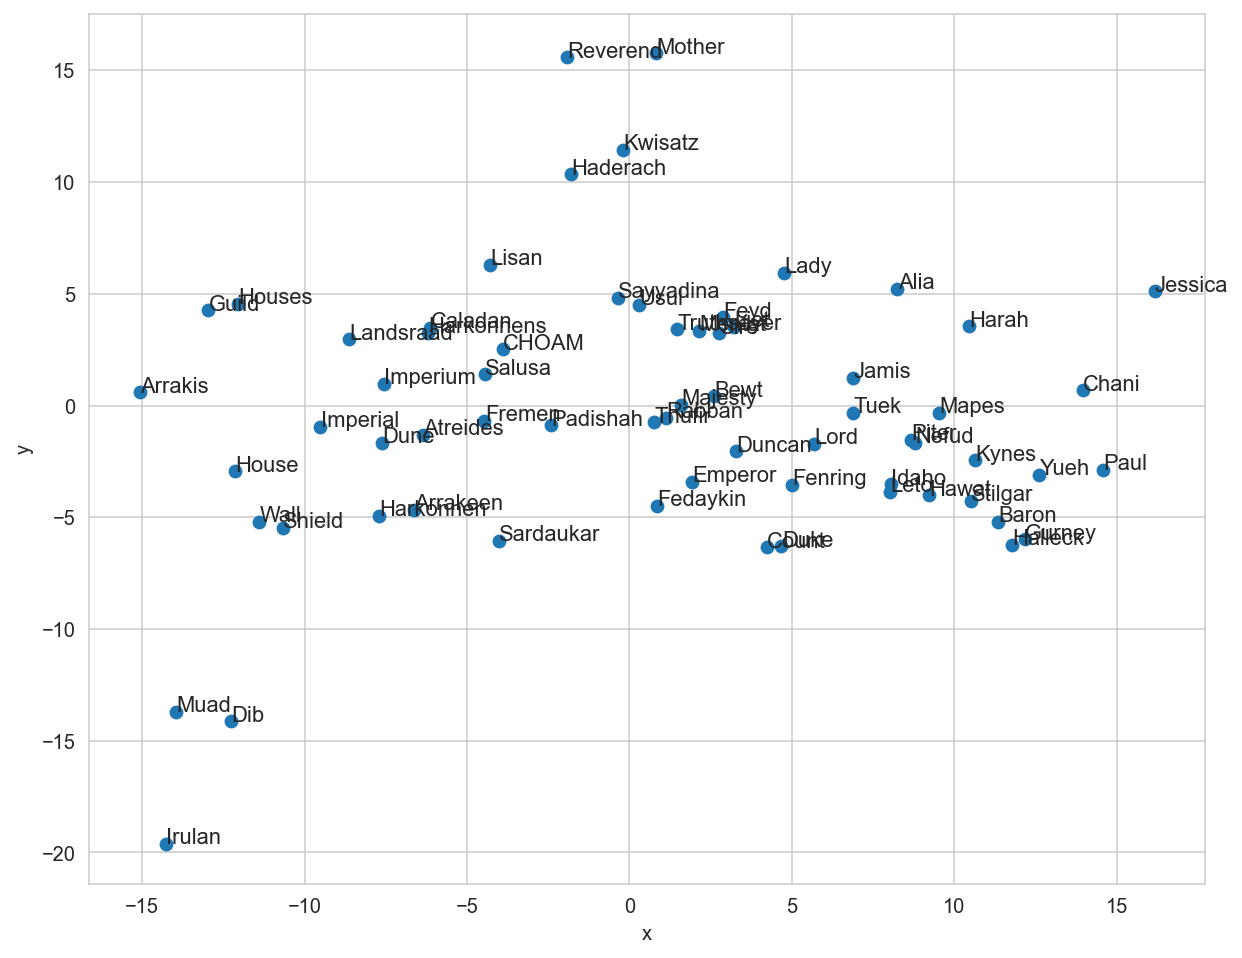

In [81]:
plot_region(charpoints, x_bounds=(-20,20), y_bounds=(-20,20)) #increase y to see Dothraki

In [82]:
len(Namelist)

69

In [88]:
# set up for plotting clusters
def plot_clusters(dataframe,clusters,x_bounds, y_bounds,colormap='rainbow'):
    slice = dataframe[
        (x_bounds[0] <= dataframe.x) &
        (dataframe.x <= x_bounds[1]) & 
        (y_bounds[0] <= dataframe.y) &
        (dataframe.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", c=clusters, colormap=colormap, s=35, figsize=(20, 15))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.008, point.y + 0.006, Namelist[point.name], fontsize=11)

## Time for clustering

In [89]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

In [90]:
#accidently changed variable name in clustering, assocciating them here
Vectors = character_vectors
len(Vectors),len(Namelist)

(69, 69)

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instea

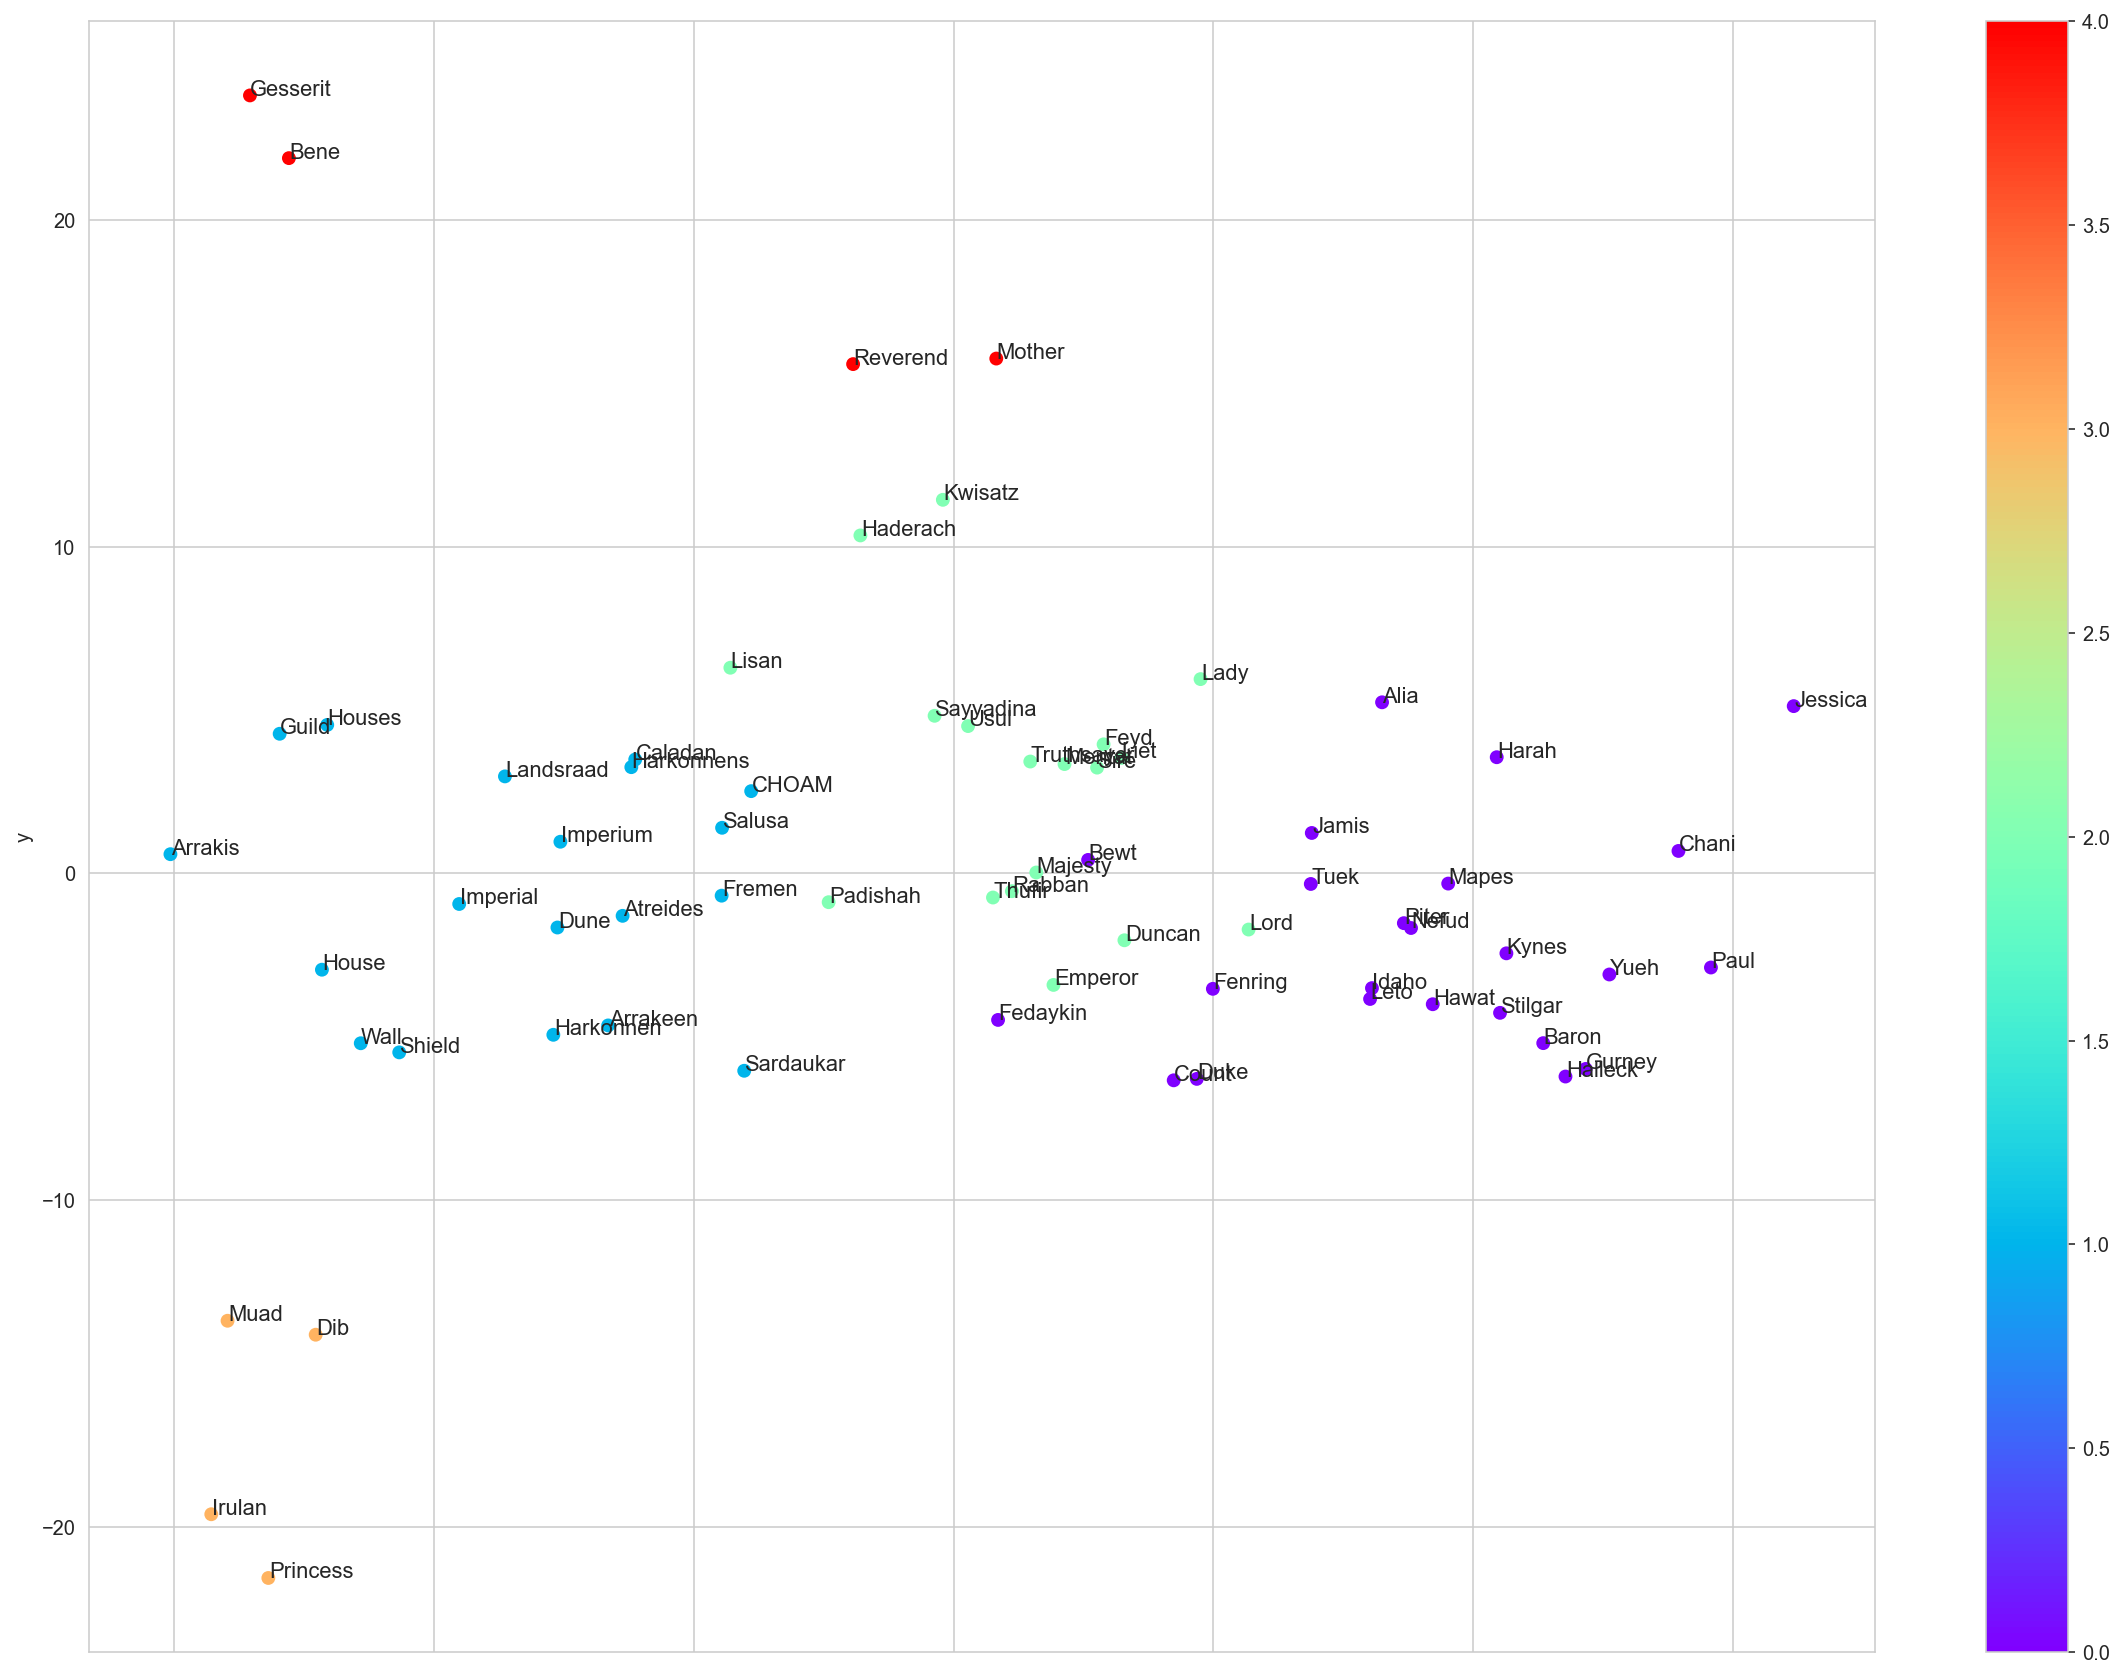

In [91]:
KM_model = KMeans(n_clusters=5,n_jobs=-2)
clusters = KM_model.fit_predict(Vectors)
ii = np.argsort(clusters)
list(zip(np.array(Namelist)[ii],clusters[ii]))
plot_clusters(charpoints,clusters, x_bounds=(-25,25), y_bounds=(-25,25),colormap='rainbow') #increase y to see Dothraki

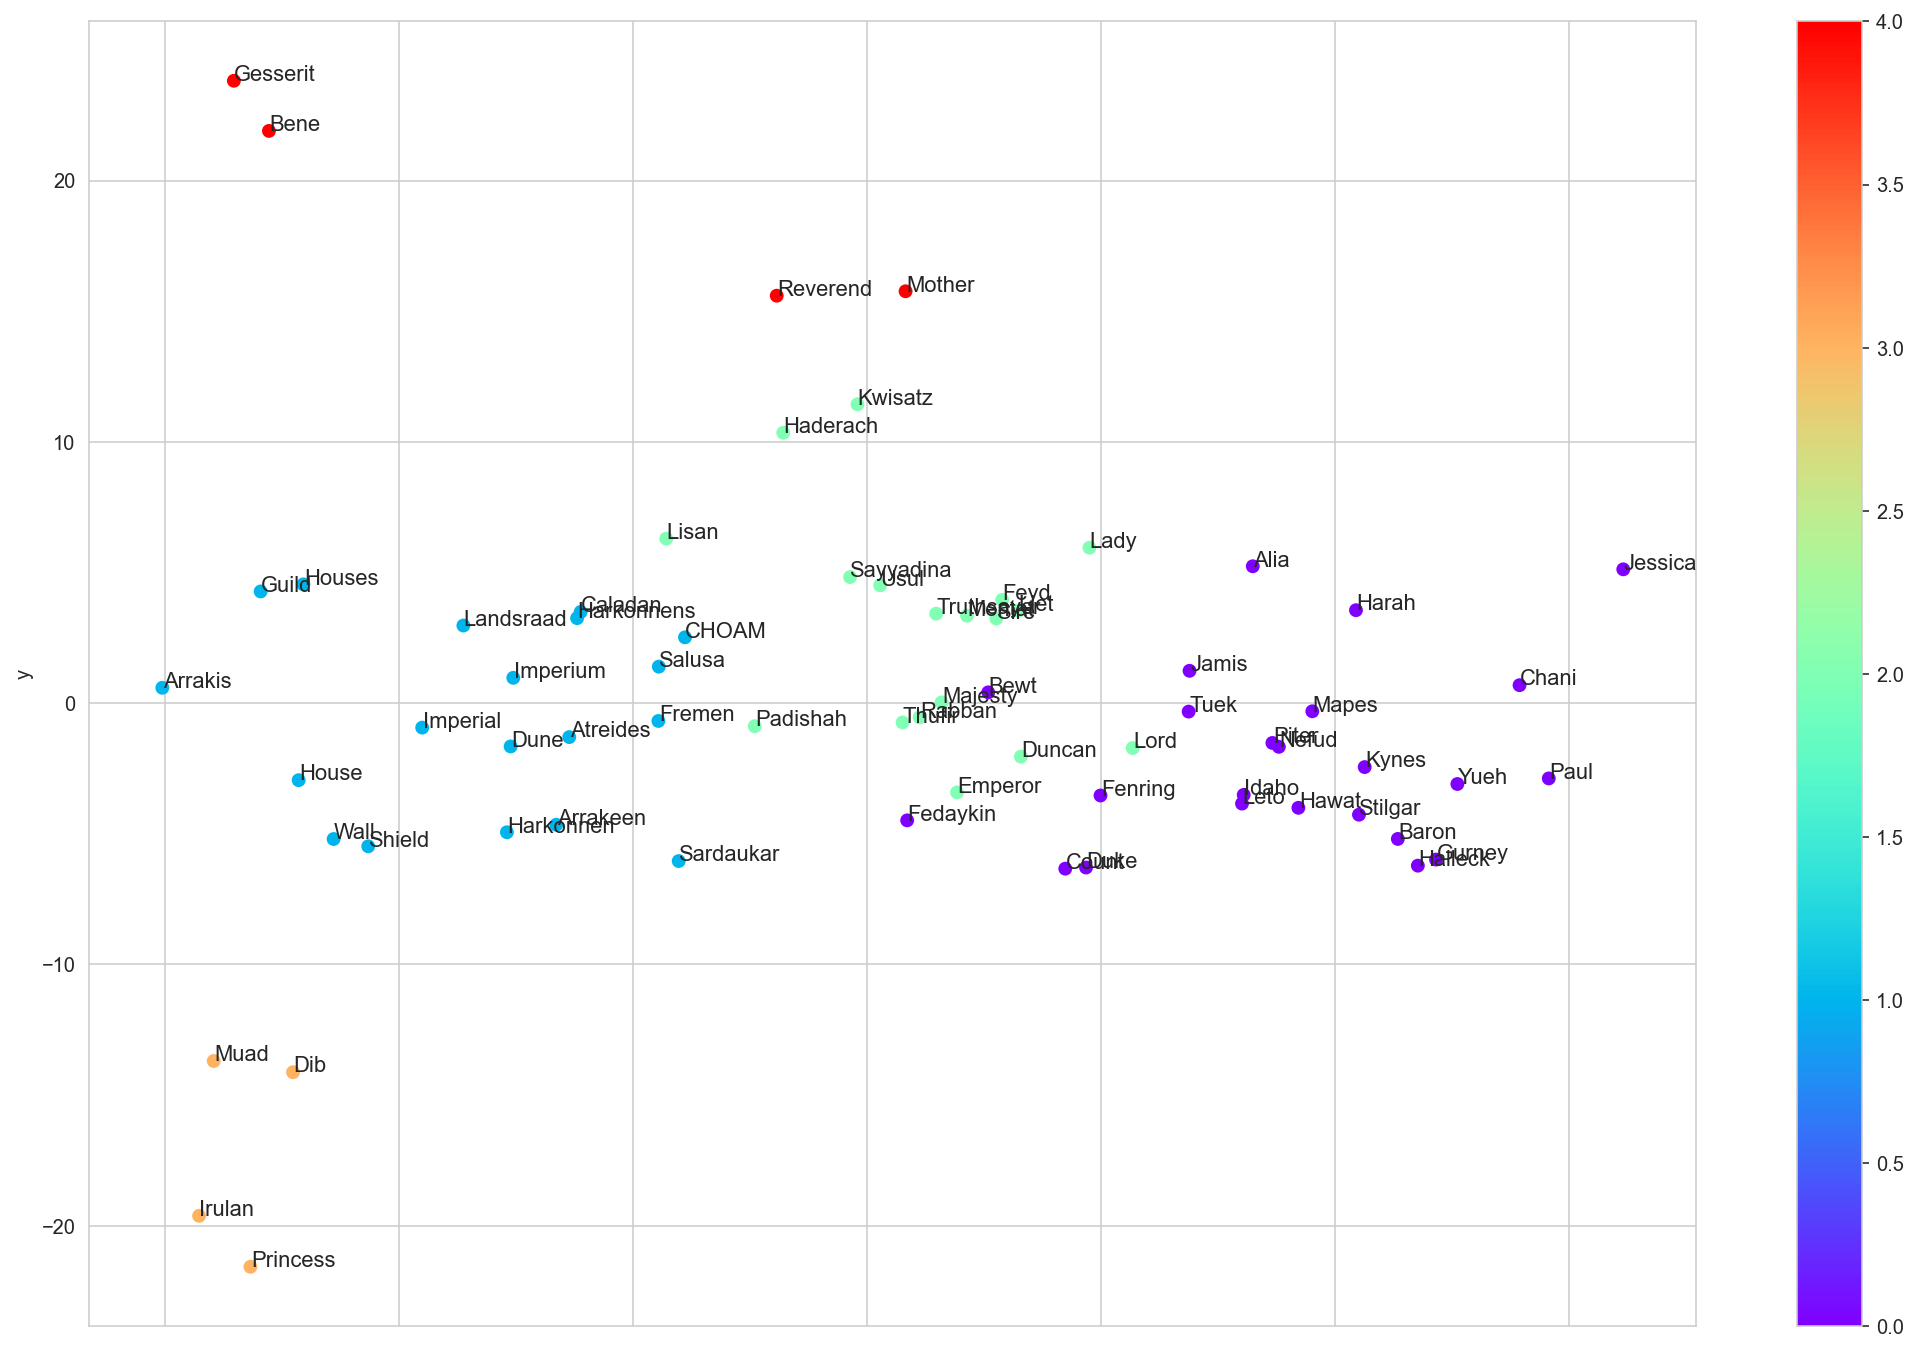

In [92]:
x_bounds=(-130,130)
y_bounds=(-200,200)
slice = charpoints[
    (x_bounds[0] <= charpoints.x) &
    (charpoints.x <= x_bounds[1]) & 
    (y_bounds[0] <= charpoints.y) &
    (charpoints.y <= y_bounds[1])
]

ax = slice.plot.scatter("x", "y", c=list(clusters), colormap='rainbow', s=35, figsize=(18, 12))
for i, point in slice.iterrows():
    ax.text(point.x + 0.008, point.y + 0.006, Namelist[point.name], fontsize=11)

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instea

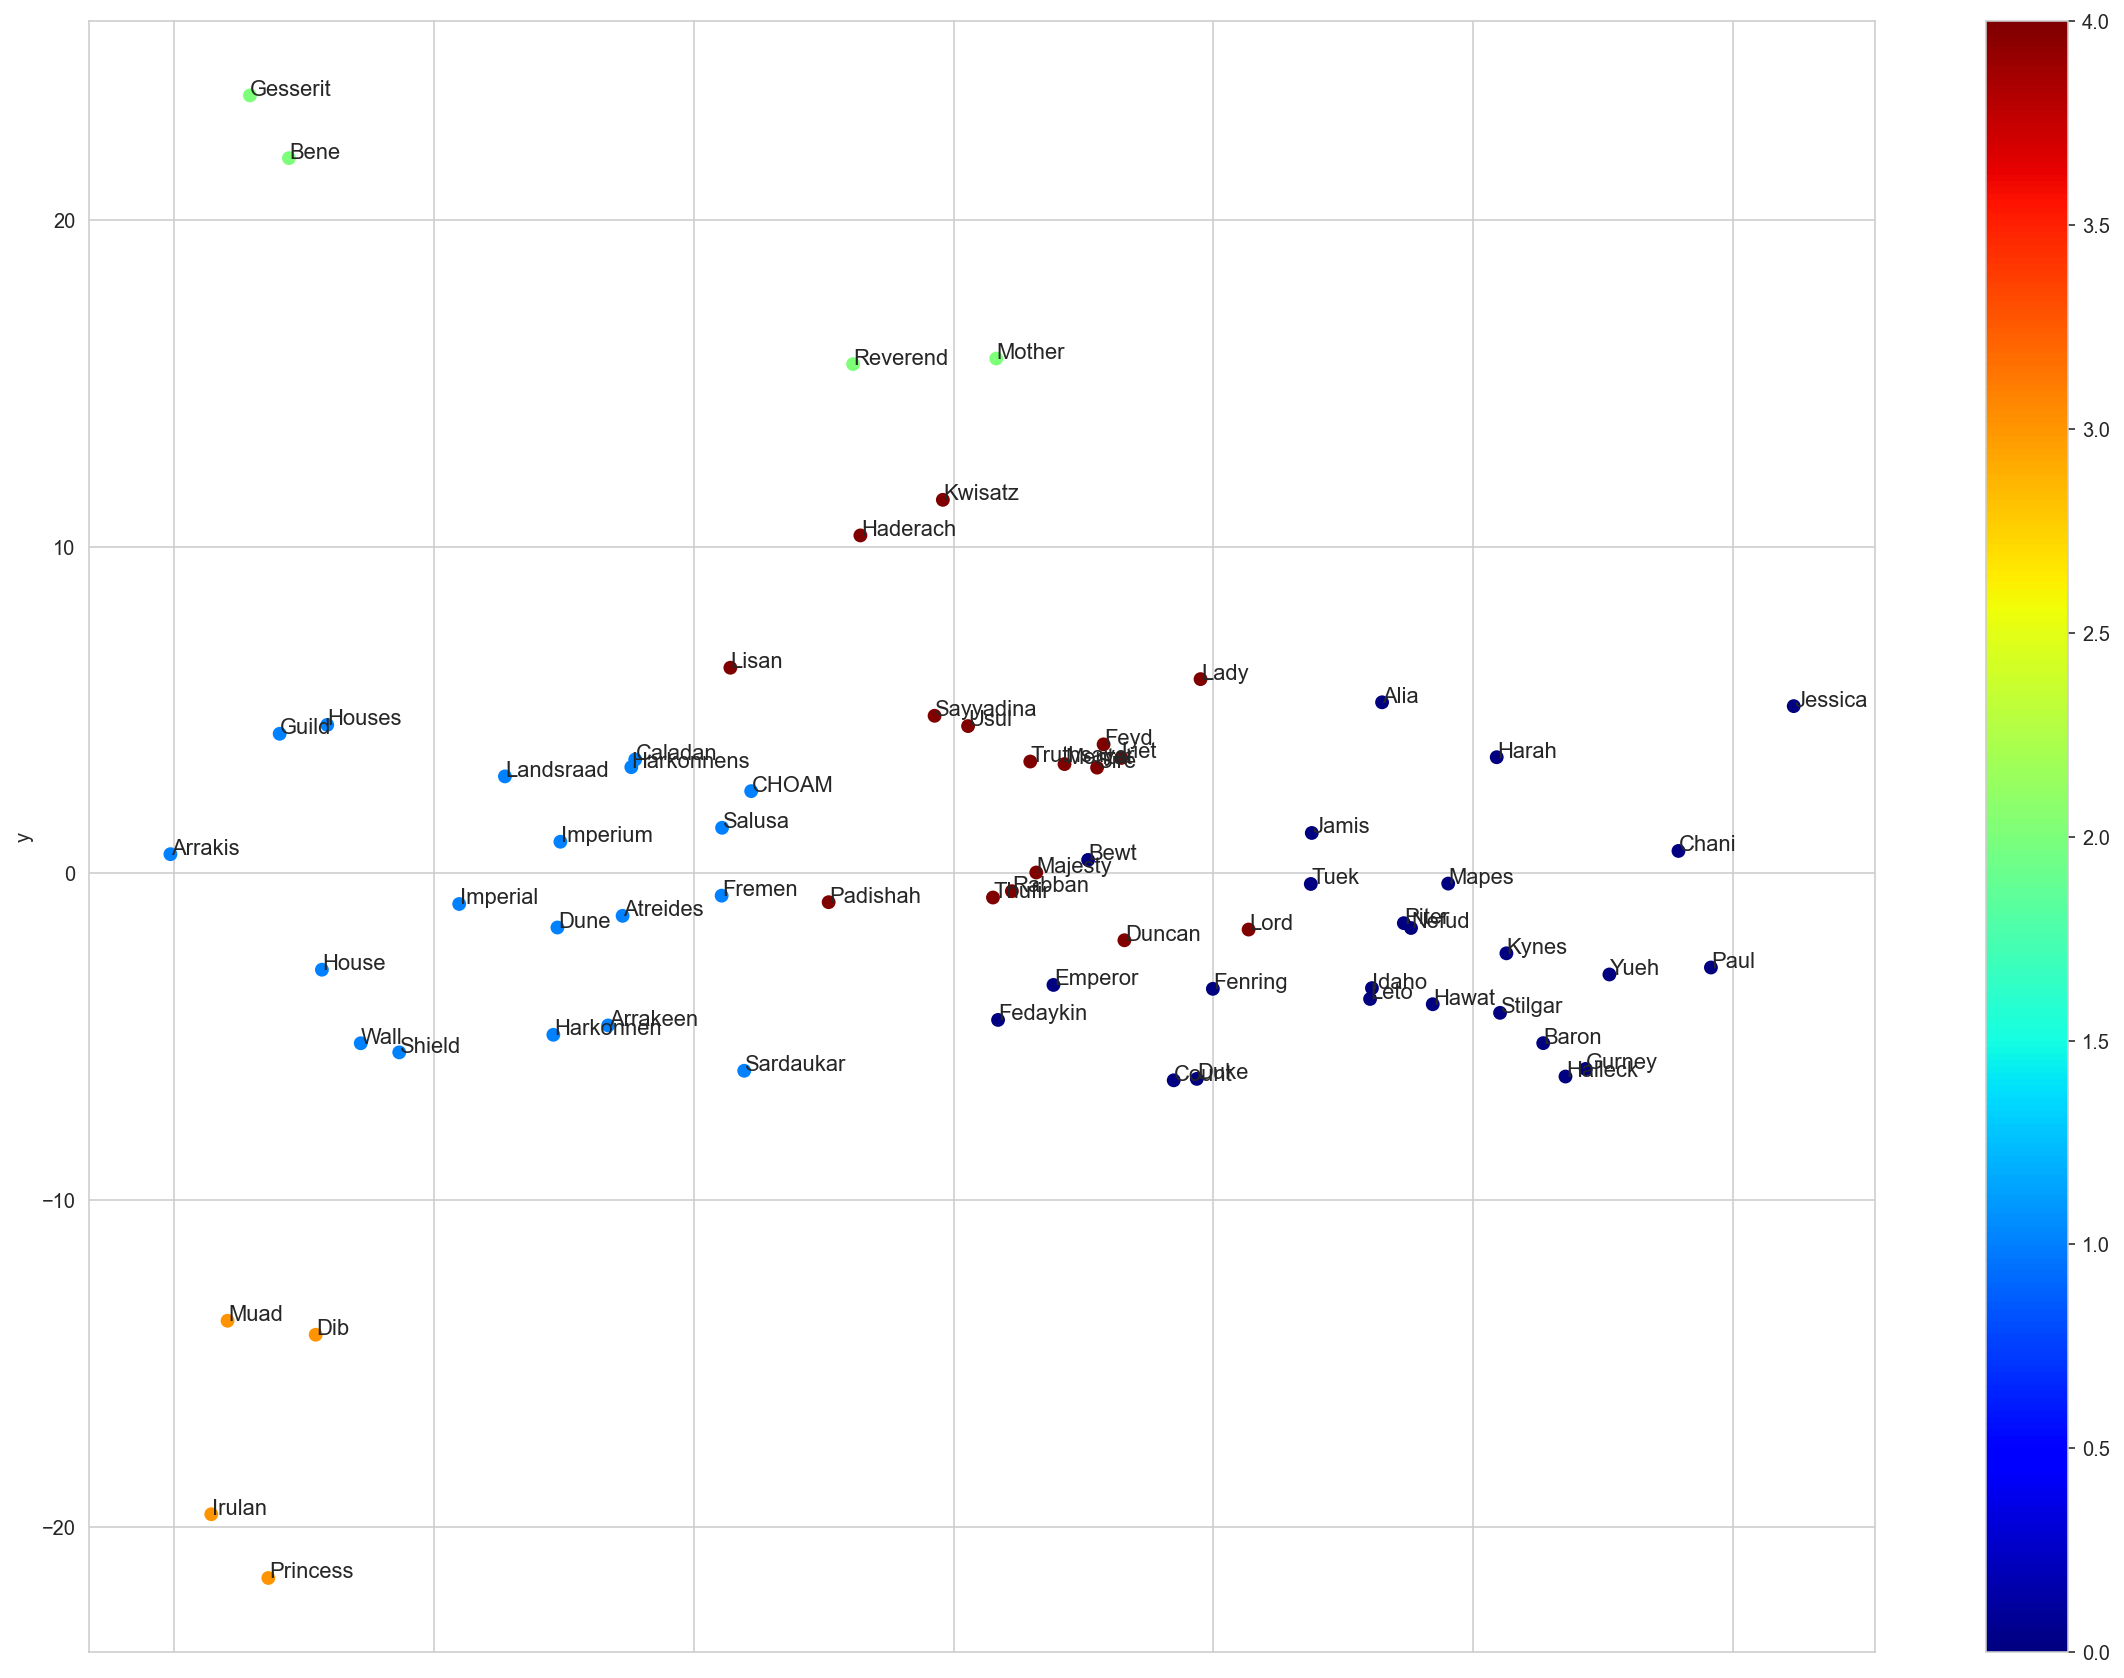

In [93]:
AC_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
clusters = AC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='jet')

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instea

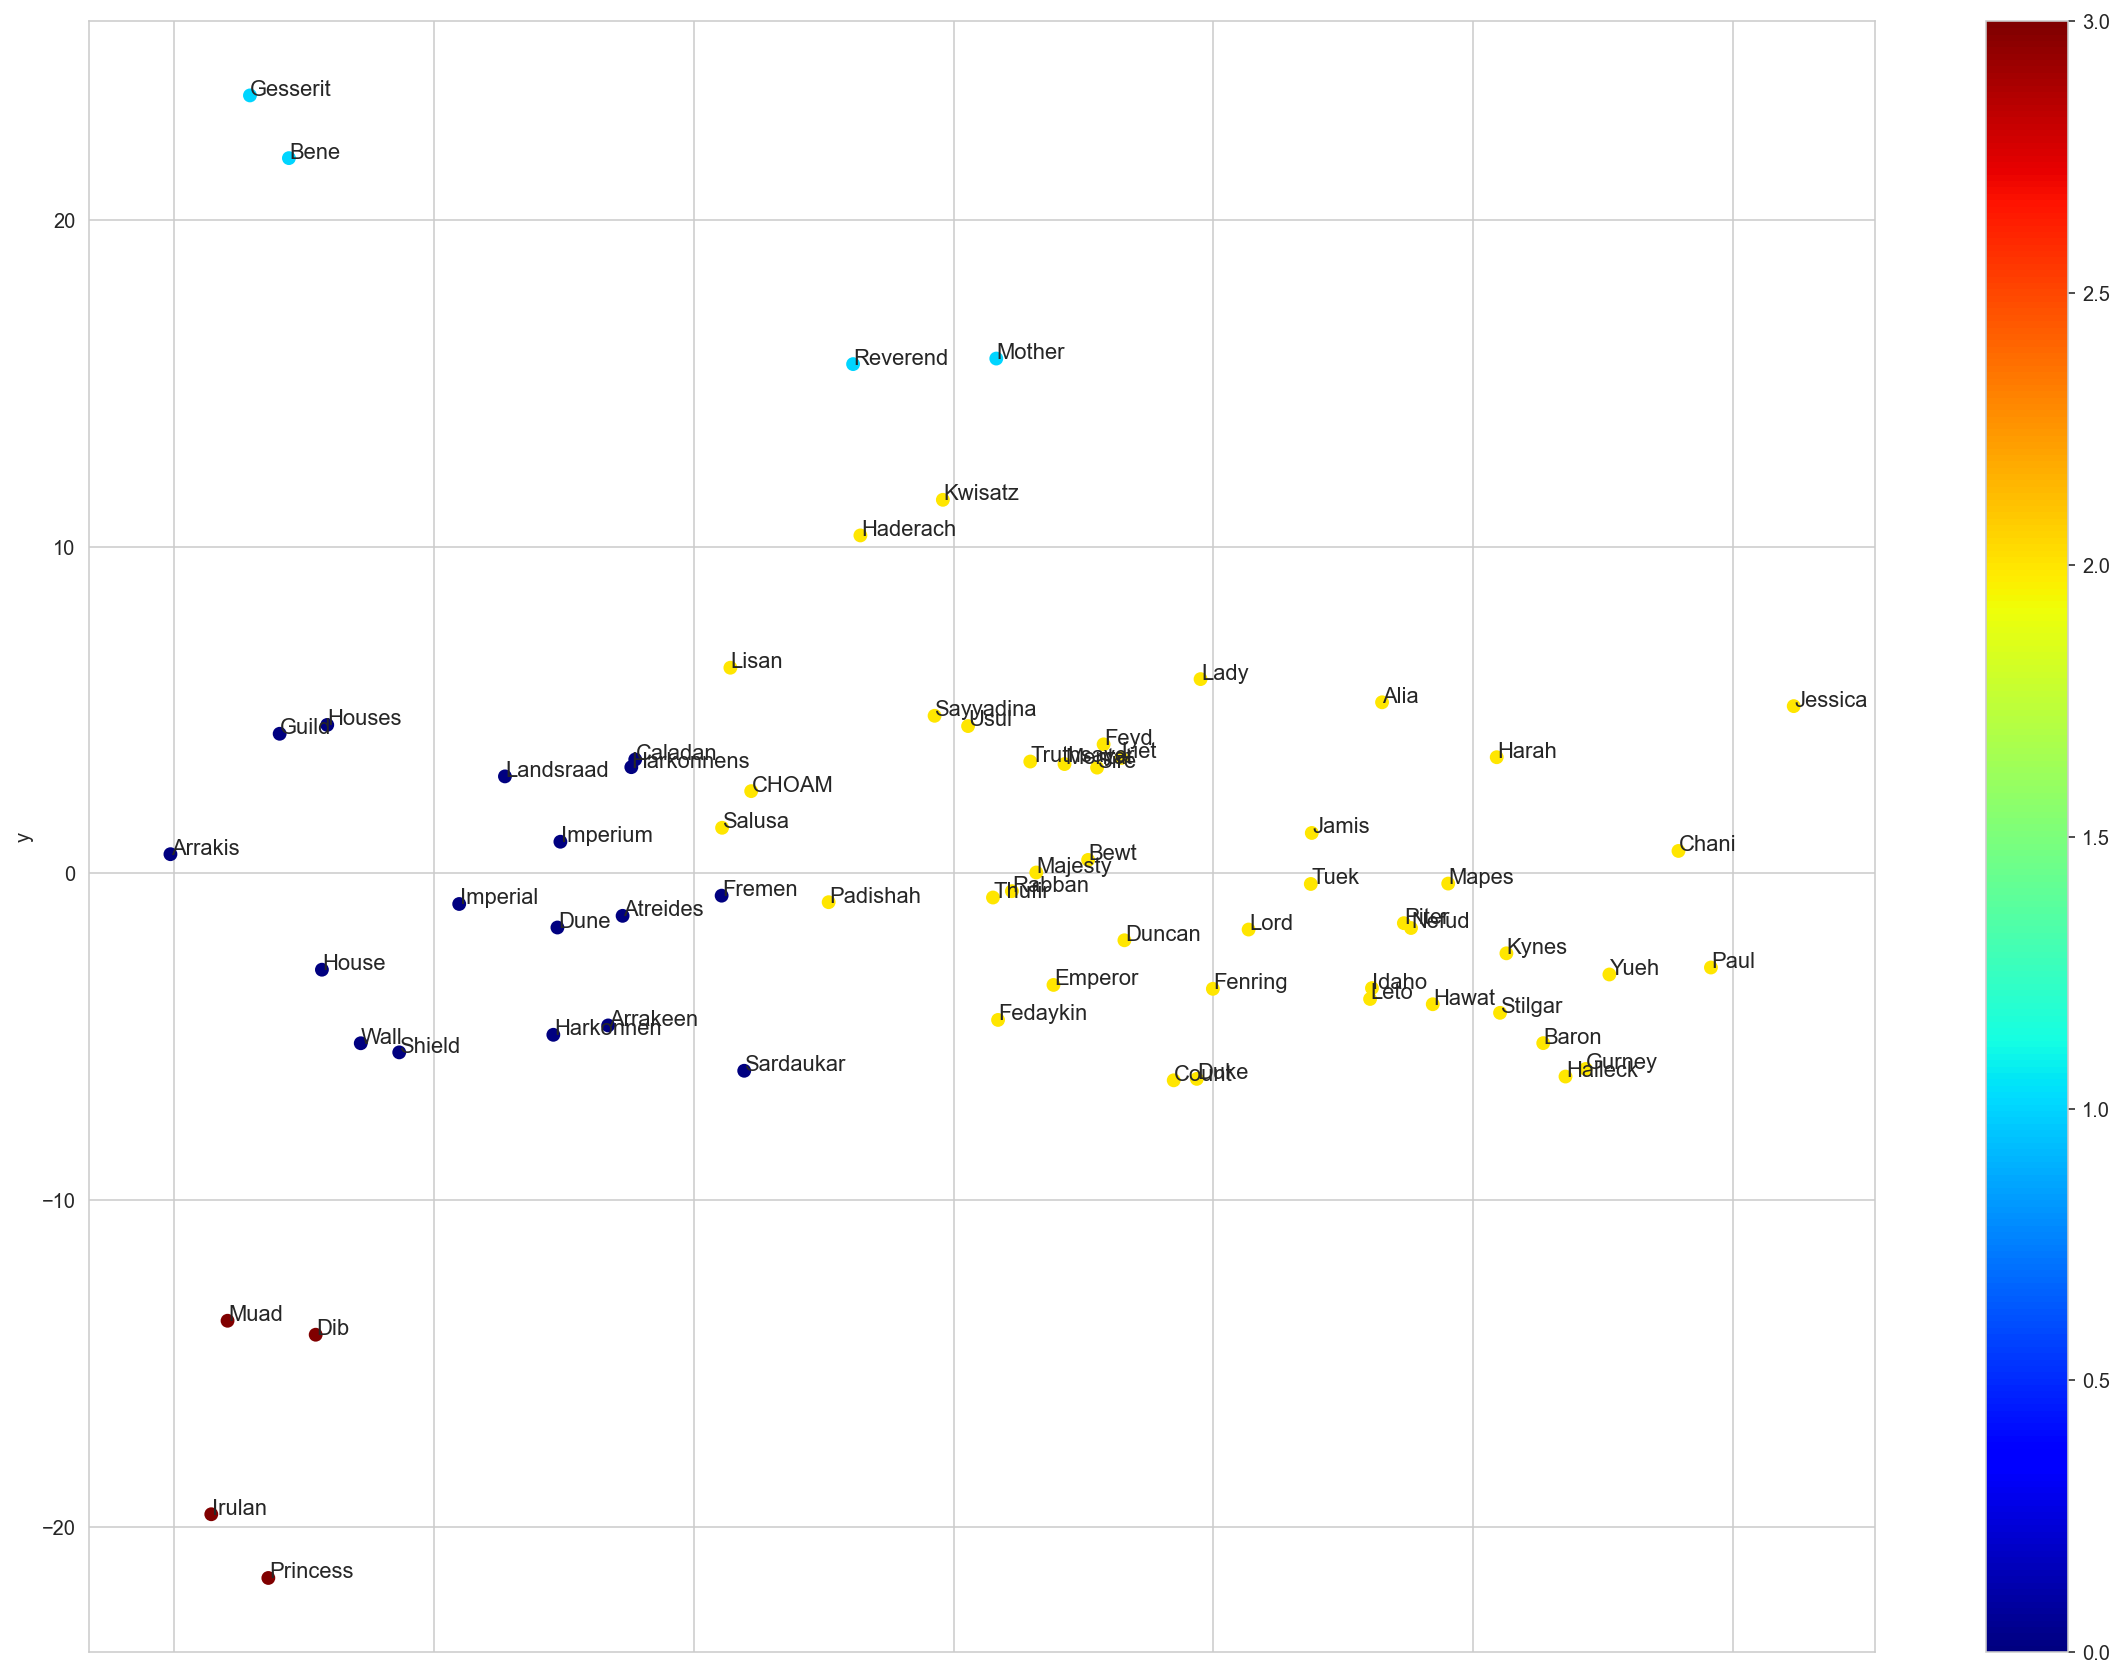

In [94]:
AC_model = AgglomerativeClustering(n_clusters=4, affinity='cosine',linkage='average')
clusters = AC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='jet')

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instea

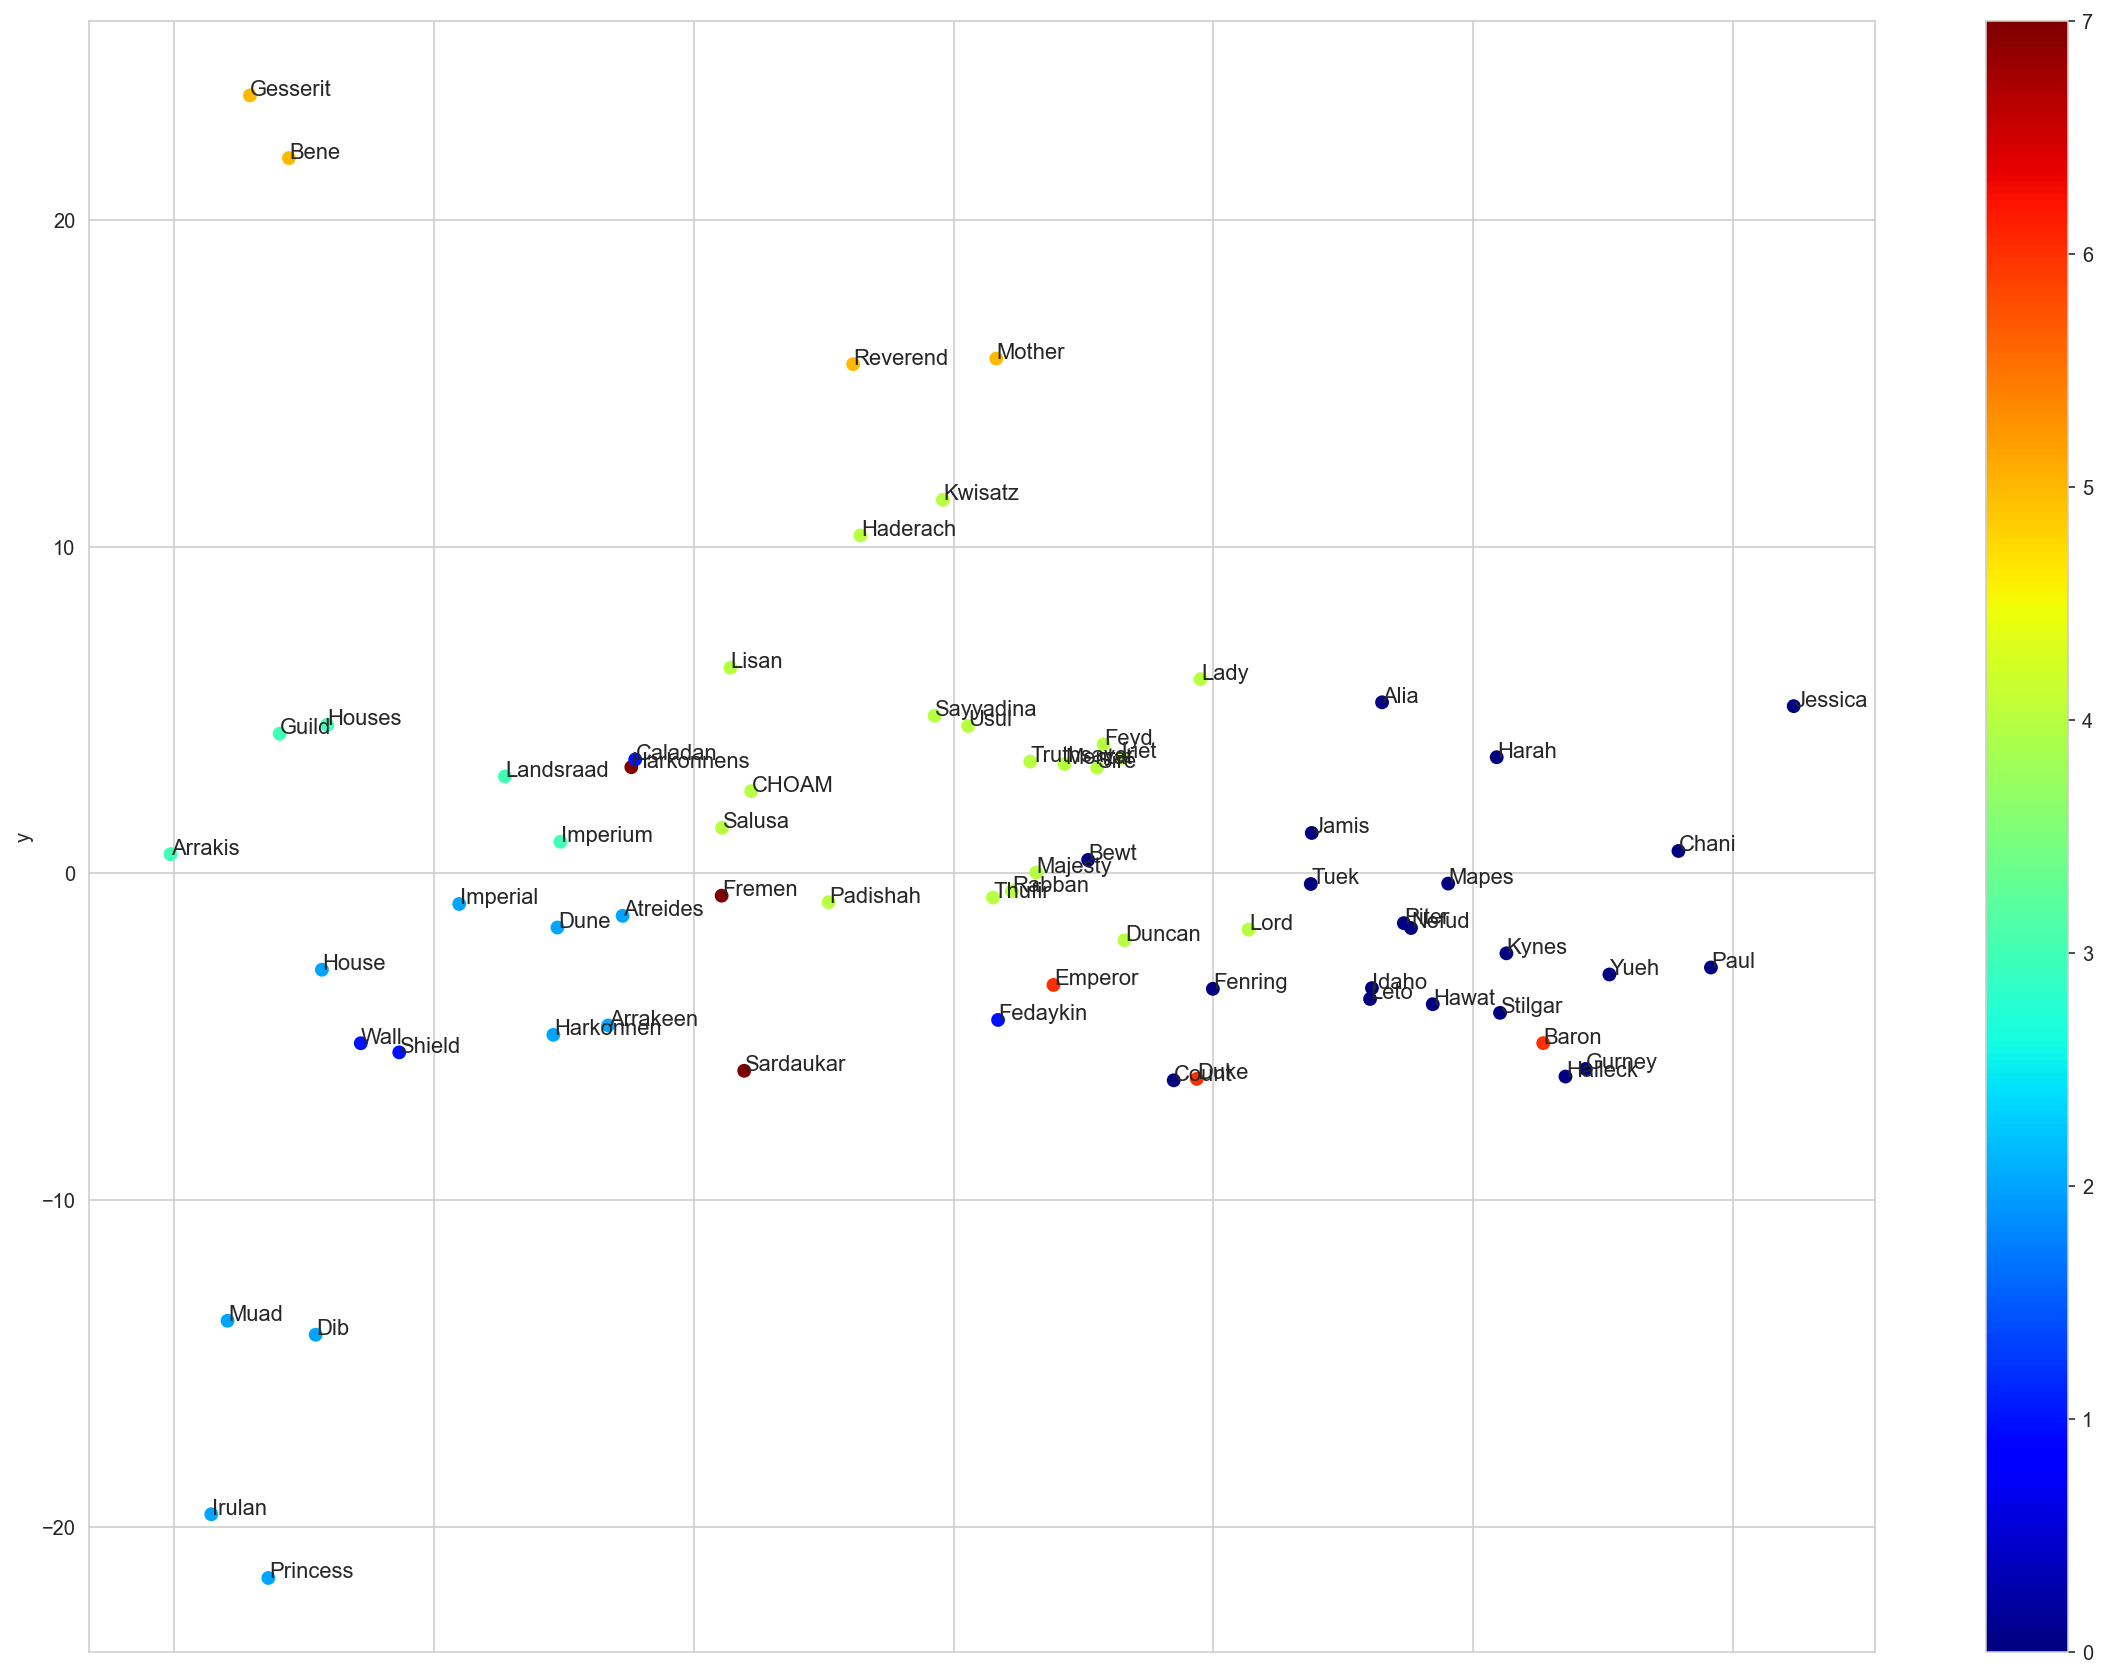

In [95]:
#?
AC_model = AgglomerativeClustering(n_clusters=8, affinity='cosine',linkage='complete')
clusters = AC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='jet')

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instea

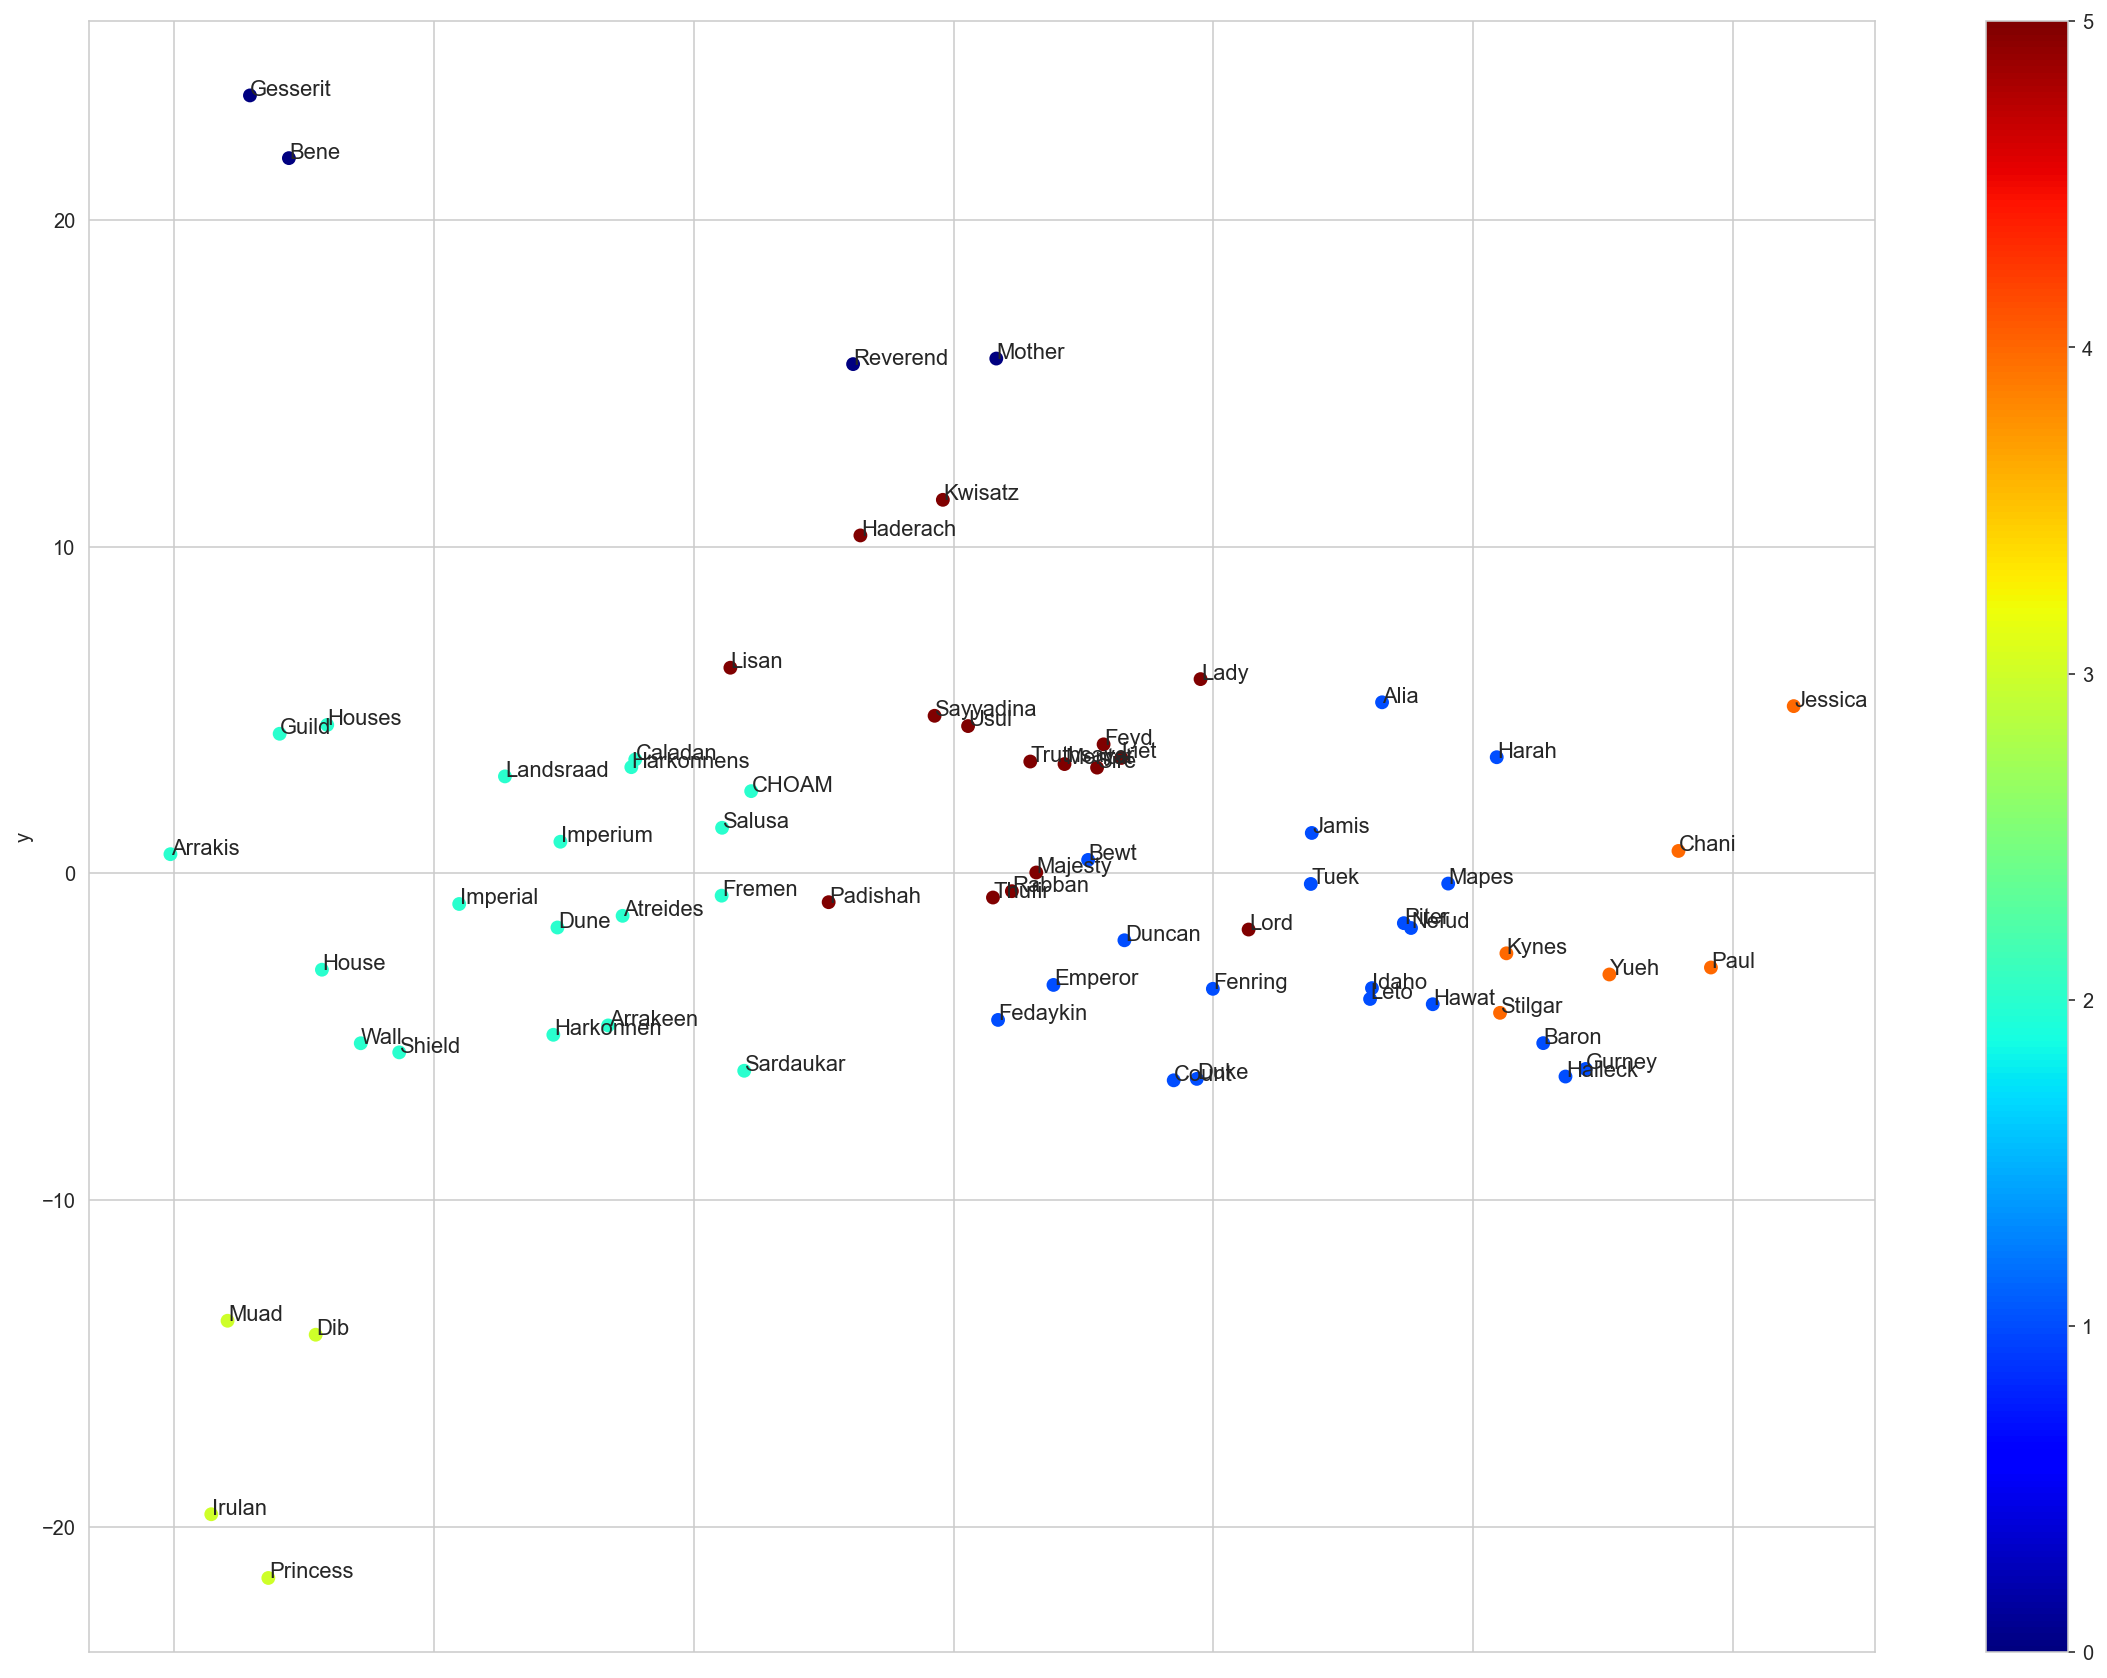

In [96]:
#character association?
AC_model = AgglomerativeClustering(n_clusters=6, affinity='manhattan',linkage='complete')
clusters = AC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='jet')

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\singan\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instea

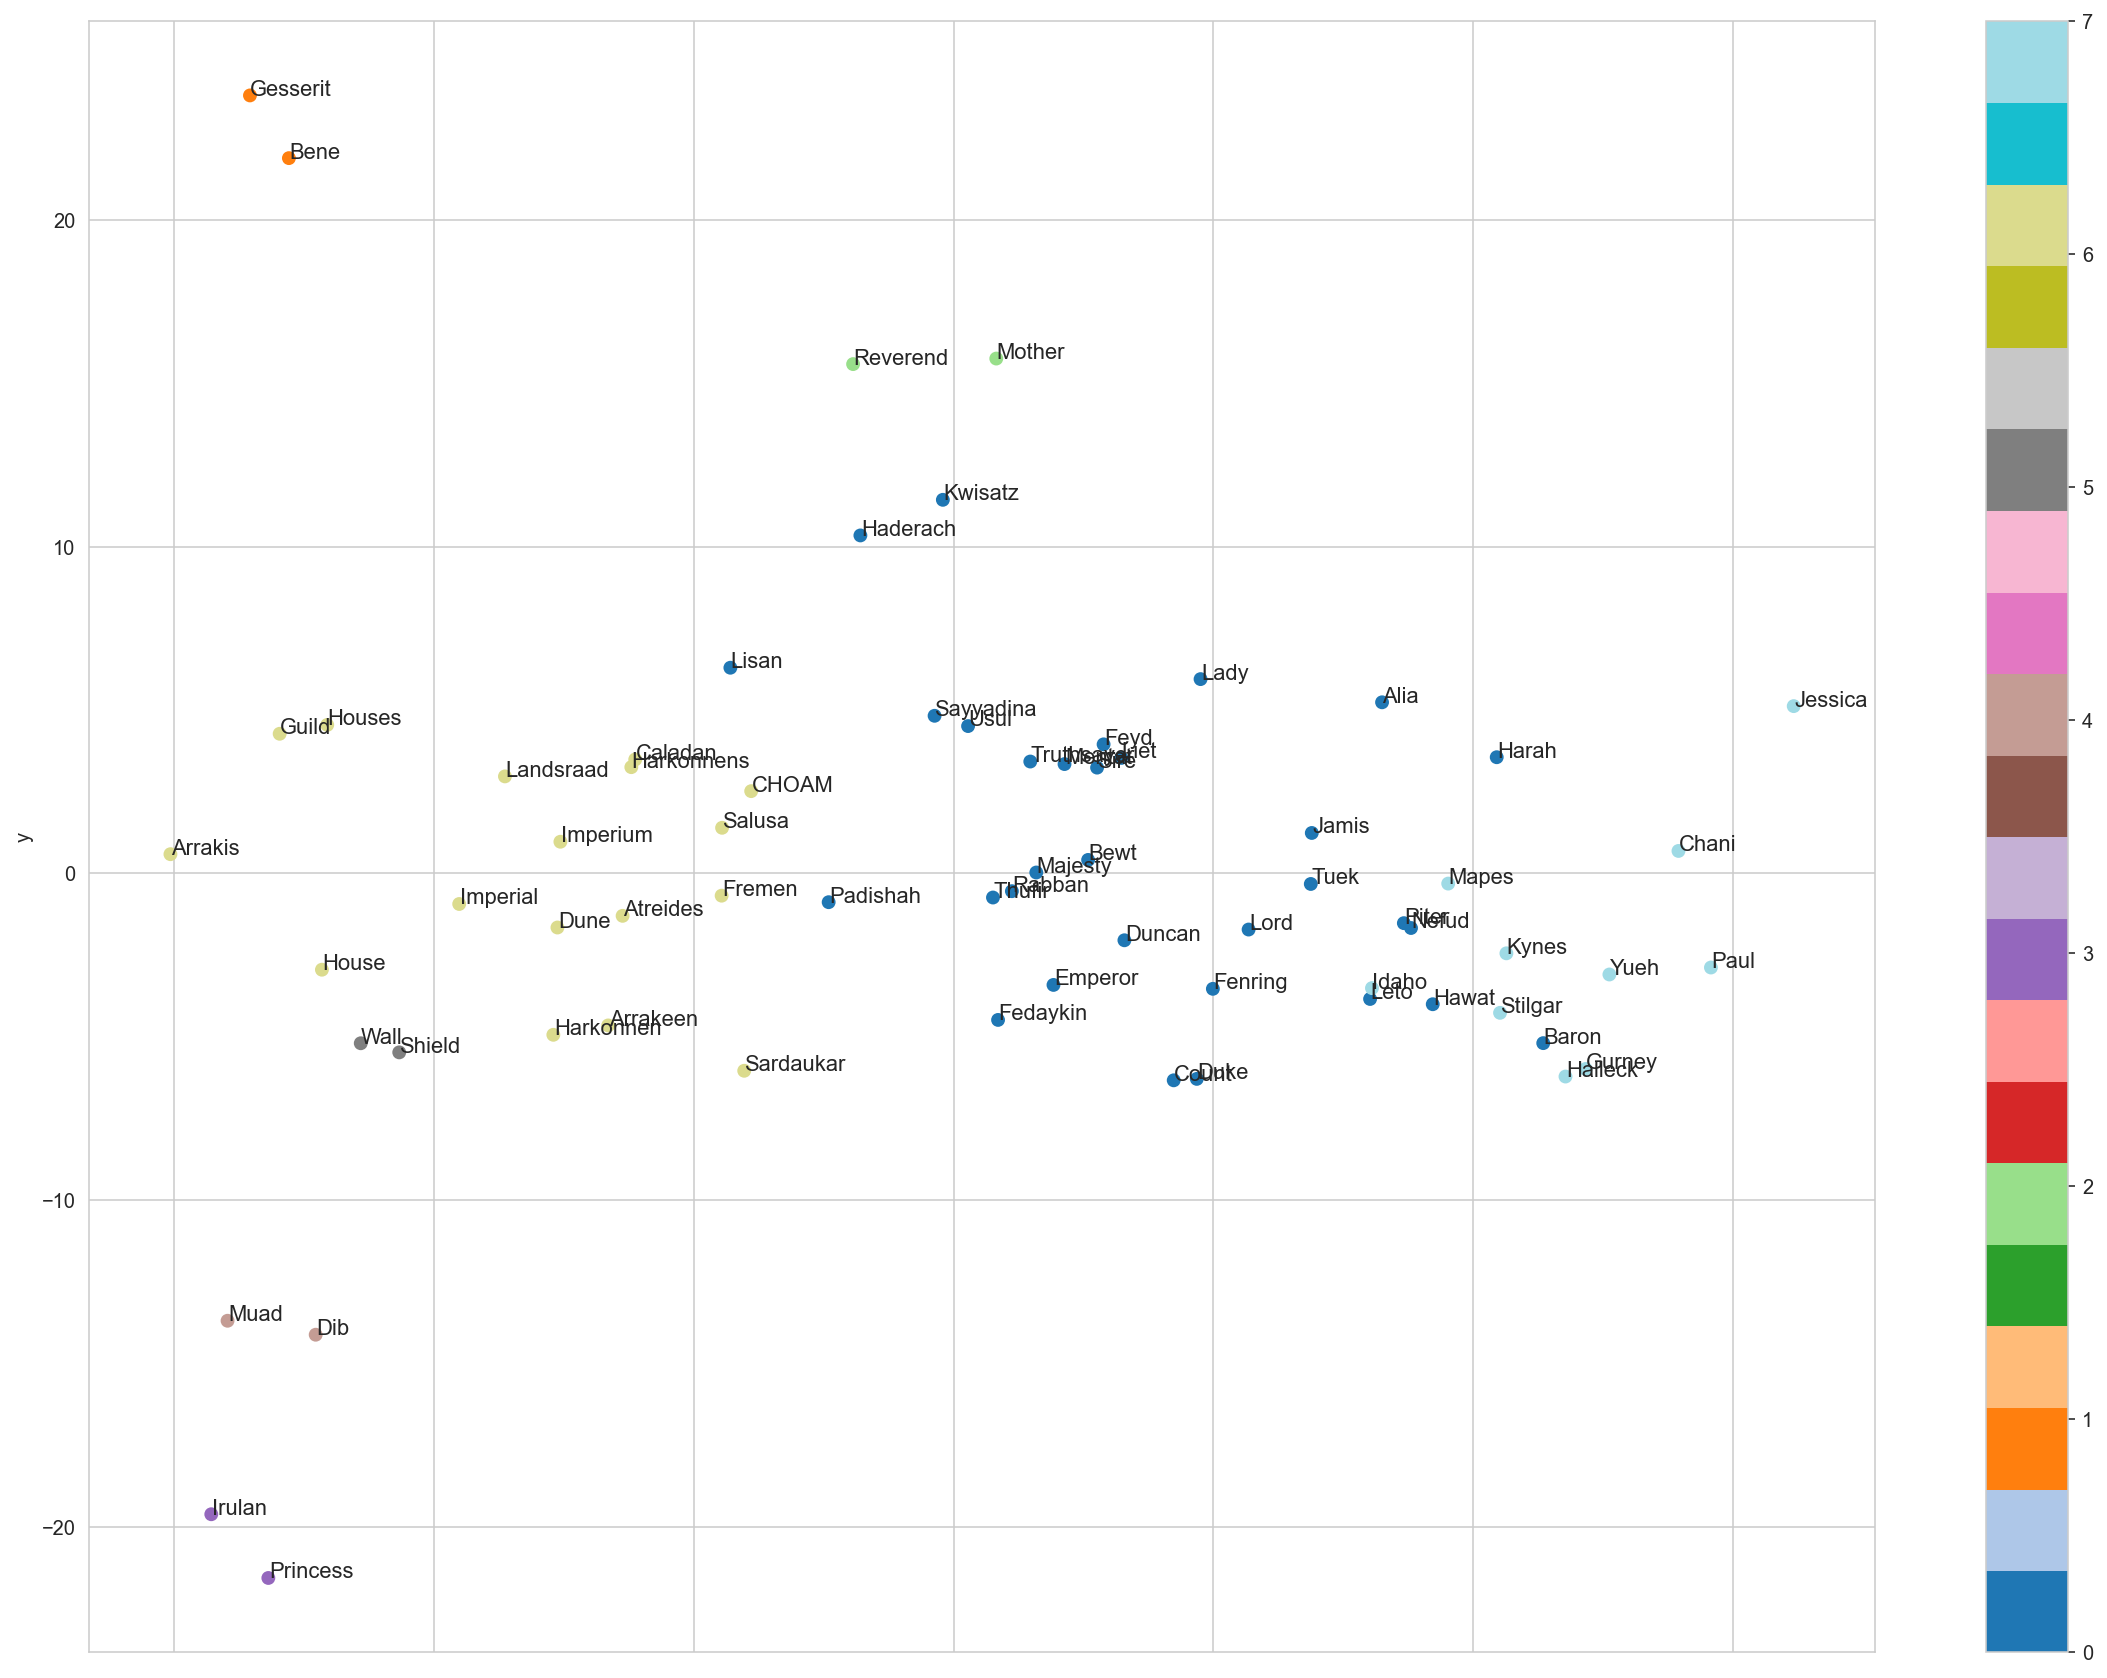

In [97]:
#one of my favorites!
SC_model = SpectralClustering(n_jobs=-2)
clusters = SC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='tab20') #increase y to see Dothraki

#### pick a clustering to use for the d3

In [98]:
ii = np.argsort(clusters)
namegrouplist = list(zip(np.array(Namelist)[ii],clusters[ii]))
namegrouplist

[('Harah', 0),
 ('Alia', 0),
 ('Count', 0),
 ('Rabban', 0),
 ('Mentat', 0),
 ('Thufir', 0),
 ('Lady', 0),
 ('Sire', 0),
 ('Nefud', 0),
 ('Usul', 0),
 ('Duncan', 0),
 ('Jamis', 0),
 ('Fenring', 0),
 ('Tuek', 0),
 ('Majesty', 0),
 ('Kwisatz', 0),
 ('Haderach', 0),
 ('Feyd', 0),
 ('Liet', 0),
 ('Lisan', 0),
 ('Bewt', 0),
 ('Padishah', 0),
 ('Truthsayer', 0),
 ('Fedaykin', 0),
 ('Lord', 0),
 ('Sayyadina', 0),
 ('Hawat', 0),
 ('Duke', 0),
 ('Emperor', 0),
 ('Baron', 0),
 ('Leto', 0),
 ('Piter', 0),
 ('Bene', 1),
 ('Gesserit', 1),
 ('Reverend', 2),
 ('Mother', 2),
 ('Princess', 3),
 ('Irulan', 3),
 ('Dib', 4),
 ('Muad', 4),
 ('Wall', 5),
 ('Shield', 5),
 ('House', 6),
 ('Imperium', 6),
 ('Houses', 6),
 ('Fremen', 6),
 ('Arrakis', 6),
 ('Dune', 6),
 ('Harkonnens', 6),
 ('Guild', 6),
 ('Atreides', 6),
 ('Harkonnen', 6),
 ('Salusa', 6),
 ('CHOAM', 6),
 ('Caladan', 6),
 ('Sardaukar', 6),
 ('Landsraad', 6),
 ('Arrakeen', 6),
 ('Imperial', 6),
 ('Jessica', 7),
 ('Idaho', 7),
 ('Halleck', 7),
 ('Gu

# Narrative Map generation
## need to customize how chapters are identified

In [100]:
countline = 0
for i, line in enumerate(book):
    countline +=1

print(countline)

17726


In [102]:
chapter_start_indexes = []
for i, line in enumerate(book):
    if "by the Princess Irulan" in line: 
        chapter_start_indexes.append(i)
            
chapter_start_indexes

[168,
 513,
 765,
 1019,
 1329,
 1457,
 1645,
 1961,
 2205,
 2313,
 2589,
 2745,
 3217,
 3391,
 3493,
 4277,
 4853,
 5313,
 5433,
 5779,
 5883,
 6317,
 6738,
 6886,
 7296,
 7742,
 8170,
 8668,
 8934,
 9296,
 9466,
 9820,
 10082,
 10470,
 10948,
 11544,
 11854,
 12347,
 12633,
 12869,
 13261,
 13580,
 13822,
 14378,
 14846,
 15164,
 15474,
 15748]

In [103]:
book[chapter_start_indexes[0]]

'—from ‘Manual of Muad’Dib’ by the Princess Irulan'

In [104]:
book_chapters = []
chapter_names = []
start_index = 0
for end_index in chapter_start_indexes[1:]:
    book_chapters.append(book[start_index:end_index-1])
    chapter_names.append(book[start_index:end_index-1][0])
    print(book[start_index:end_index-1][0])
    start_index = end_index
chapter_names

DUNE
—from ‘Manual of Muad’Dib’ by the Princess Irulan
—from ‘Muad’Dib, Family Commentaries’ by the Princess Irulan
—from ‘A Child’s History of Muad’Dib’ by the Princess Irulan
—from ‘Dictionary of Muad’Dib’ by the Princess Irulan
—from ‘Muad’Dib, Family Commentaries’ by the Princess Irulan
—from Analysis: The Arrakeen Crisis’ by the Princess Irulan [private circulation: B.G. file number AR-81088587]
—from ‘A Child’s History of Muad’Dib’ by the Princess Irulan
—from ‘The Humanity of Muad’Dib’ by the Princess Irulan
—from ‘Muad’Dib: Family Commentaries’ by the Princess Irulan
—from ‘Muad’Dib: Family Commentaries’ by the Princess Irulan
—from ‘Manual of Muad’Dib’ by the Princess Irulan
—from ‘Manual of Muad’Dib’ by the Princess Irulan
—from ‘Collected Sayings of Muad’Dib’ by the Princess Irulan
—‘In My Father’s House’ by the Princess Irulan
—from ‘Collected Sayings of Muad’Dib’ by the Princess Irulan
—from ‘The Collected Sayings of Muad’Dib’ by the Princess Irulan
from ‘Songs of Muad’Dib

['DUNE',
 '—from ‘Manual of Muad’Dib’ by the Princess Irulan',
 '—from ‘Muad’Dib, Family Commentaries’ by the Princess Irulan',
 '—from ‘A Child’s History of Muad’Dib’ by the Princess Irulan',
 '—from ‘Dictionary of Muad’Dib’ by the Princess Irulan',
 '—from ‘Muad’Dib, Family Commentaries’ by the Princess Irulan',
 '—from Analysis: The Arrakeen Crisis’ by the Princess Irulan [private circulation: B.G. file number AR-81088587]',
 '—from ‘A Child’s History of Muad’Dib’ by the Princess Irulan',
 '—from ‘The Humanity of Muad’Dib’ by the Princess Irulan',
 '—from ‘Muad’Dib: Family Commentaries’ by the Princess Irulan',
 '—from ‘Muad’Dib: Family Commentaries’ by the Princess Irulan',
 '—from ‘Manual of Muad’Dib’ by the Princess Irulan',
 '—from ‘Manual of Muad’Dib’ by the Princess Irulan',
 '—from ‘Collected Sayings of Muad’Dib’ by the Princess Irulan',
 '—‘In My Father’s House’ by the Princess Irulan',
 '—from ‘Collected Sayings of Muad’Dib’ by the Princess Irulan',
 '—from ‘The Collected S

In [105]:
#turn each chapter into a single string, then word tokenize that string

book_chapters_strings = []
for chapter in book_chapters:
    chapstring = ""
    for line in chapter:
        chapstring +=  " " + line
    book_chapters_strings.append(chapstring)

In [108]:
#tokenize chapters
from nltk.tokenize import word_tokenize, wordpunct_tokenize, WhitespaceTokenizer

# Word Tokenize: Creates tokens from words and punctuation
book_chapters_tokenized = []
for chapter in book_chapters_strings:
    print(len(chapter))
    book_chapters_tokenized.append(word_tokenize(chapter))

27779
18795
13059
22389
8254
13013
22758
18686
7835
17353
11494
34442
10060
7216
45629
46053
25383
9208
21927
5536
26592
30304
9085
24654
25275
22572
31204
13595
19221
15754
23970
19488
28524
27627
41538
18909
32409
16749
15817
26911
22290
15410
35826
28656
22375
19559
22248


In [109]:
characters_in_chapter = []
for chapter in book_chapters_tokenized:
    names_in_chapter = []
    for name in Namelist:
        name_count = chapter.count(name)
        if name_count >= 5:        #include minimum count to eliminate stray references
            names_in_chapter.append(name)
    characters_in_chapter.append(names_in_chapter)

characters_in_chapter

[['Paul',
  'Jessica',
  'Arrakis',
  'Bene',
  'Dib',
  'Gesserit',
  'Muad',
  'Mother',
  'Reverend',
  'Atreides',
  'Harkonnens',
  'Dune',
  'Kwisatz',
  'Haderach',
  'Truthsayer'],
 ['Baron',
  'Duke',
  'Hawat',
  'Arrakis',
  'Emperor',
  'Leto',
  'Harkonnen',
  'Atreides',
  'Piter',
  'Mentat',
  'Imperial',
  'House',
  'Feyd'],
 ['Paul', 'Jessica', 'Bene', 'Gesserit', 'Mother', 'Reverend'],
 ['Paul',
  'Duke',
  'Hawat',
  'Gurney',
  'Arrakis',
  'Halleck',
  'Mother',
  'Reverend',
  'Thufir'],
 ['Paul', 'Fremen', 'Yueh'],
 ['Paul',
  'Duke',
  'Fremen',
  'Hawat',
  'Gurney',
  'Arrakis',
  'Emperor',
  'Sardaukar',
  'Harkonnens',
  'Mentat',
  'Houses',
  'CHOAM'],
 ['Jessica',
  'Duke',
  'Fremen',
  'Hawat',
  'Leto',
  'Bene',
  'Gesserit',
  'Mother',
  'Yueh',
  'Lady',
  'Mapes',
  'Caladan'],
 ['Paul', 'Jessica', 'Duke', 'Harkonnen', 'Yueh'],
 ['Paul', 'Yueh'],
 ['Paul', 'Jessica', 'Duke', 'Hawat', 'Arrakis', 'Leto', 'Lady', 'Mapes'],
 ['Duke', 'Gurney', 'Arr

### Write json for the d3

In [110]:
#the one is for the web d3
json = """{
  "nodes": [
"""

for name,group in namegrouplist:
    json = json + "    {\"id\": \"" + name + "\", \"group\": " + str(group) + "},\n"

json = json[:-2] + """   ],      
  "links": [ 
"""  #[:-2] leaves out ,\n on last line before adding square bracket

for line in interaction_map:
    if line[2]>=55:
        json = json + "    {\"source\": \"" + line[0] + "\", \"target\": \"" + line[1] + "\", \"value\": " + str(line[2]) + "},\n"

json = json[:-2] + """  ]
}"""

In [115]:
basedir = r"J:\InteractionMaps" + "\\"
file = open(basedir +bookfile[-4]+"_interactions.json",'w')   #'x' creates a new file and opens it for writing
file.write(json)
file.close()

In [116]:
print(json)

{
  "nodes": [
    {"name": "Harah", "group": 0},
    {"name": "Alia", "group": 0},
    {"name": "Count", "group": 0},
    {"name": "Rabban", "group": 0},
    {"name": "Mentat", "group": 0},
    {"name": "Thufir", "group": 0},
    {"name": "Lady", "group": 0},
    {"name": "Sire", "group": 0},
    {"name": "Nefud", "group": 0},
    {"name": "Usul", "group": 0},
    {"name": "Duncan", "group": 0},
    {"name": "Jamis", "group": 0},
    {"name": "Fenring", "group": 0},
    {"name": "Tuek", "group": 0},
    {"name": "Majesty", "group": 0},
    {"name": "Kwisatz", "group": 0},
    {"name": "Haderach", "group": 0},
    {"name": "Feyd", "group": 0},
    {"name": "Liet", "group": 0},
    {"name": "Lisan", "group": 0},
    {"name": "Bewt", "group": 0},
    {"name": "Padishah", "group": 0},
    {"name": "Truthsayer", "group": 0},
    {"name": "Fedaykin", "group": 0},
    {"name": "Lord", "group": 0},
    {"name": "Sayyadina", "group": 0},
    {"name": "Hawat", "group": 0},
    {"name": "Duke", 

In [117]:
#for the matrix d3
json = """{
  "nodes": [
"""

for name,group in namegrouplist:
    json = json + "    {\"name\": \"" + name + "\", \"group\": " + str(group) + "},\n"

json = json[:-2] + """   ],      
  "links": [ 
"""  #[:-2] leaves out ,\n on last line before adding square bracket

for line in interaction_map_all:
    json = json + "    {\"source\": \"" + str(Namelist.index(line[1])) + "\", \"target\": \"" + str(Namelist.index(line[0])) + "\", \"value\": " + str(line[2]) + "},\n"

json = json[:-2] + """  ]
}"""

In [118]:
file = open(basedir+bookfile[-4]+"_interactions_matrix_draft.json",'w')   #'x' creates a new file and opens it for writing
file.write(json)
file.close()

In [119]:
print(json)

{
  "nodes": [
    {"name": "Harah", "group": 0},
    {"name": "Alia", "group": 0},
    {"name": "Count", "group": 0},
    {"name": "Rabban", "group": 0},
    {"name": "Mentat", "group": 0},
    {"name": "Thufir", "group": 0},
    {"name": "Lady", "group": 0},
    {"name": "Sire", "group": 0},
    {"name": "Nefud", "group": 0},
    {"name": "Usul", "group": 0},
    {"name": "Duncan", "group": 0},
    {"name": "Jamis", "group": 0},
    {"name": "Fenring", "group": 0},
    {"name": "Tuek", "group": 0},
    {"name": "Majesty", "group": 0},
    {"name": "Kwisatz", "group": 0},
    {"name": "Haderach", "group": 0},
    {"name": "Feyd", "group": 0},
    {"name": "Liet", "group": 0},
    {"name": "Lisan", "group": 0},
    {"name": "Bewt", "group": 0},
    {"name": "Padishah", "group": 0},
    {"name": "Truthsayer", "group": 0},
    {"name": "Fedaykin", "group": 0},
    {"name": "Lord", "group": 0},
    {"name": "Sayyadina", "group": 0},
    {"name": "Hawat", "group": 0},
    {"name": "Duke", 

In [120]:
ID_in_chapter = []
for chapter in characters_in_chapter:
    this_chapt = []
    for name in chapter:
        this_chapt.append(name[0:4])
    ID_in_chapter.append(this_chapt)

In [121]:
#for the Narrative map d3
json = """
{
  "characters": [
       
"""
cluster = "light"

for name,cluster in namegrouplist:
#for name in Namelist:
    json = json + "       {\"id\": \"" + name[0:4] + "\", \"name\": \"" + name + "\", \"affiliation\": \"" + str(cluster) + "\"},\n"
    #json = json + "    {\"name\": \"" + name + "\", \"group\": " + str(group) + "},\n"

json = json[:-2] + """
],
  "scenes": [
"""  #[:-2] leaves out ,\n on last line before adding square bracket

for chapt in ID_in_chapter:
    json = json + "      " + str(chapt) + ",\n"

json = json[:-2] + """  
]
}"""

json = json.replace("'","\"")  #javascript doesn't like single quotes
print(json)


{
  "characters": [
       
       {"id": "Hara", "name": "Harah", "affiliation": "0"},
       {"id": "Alia", "name": "Alia", "affiliation": "0"},
       {"id": "Coun", "name": "Count", "affiliation": "0"},
       {"id": "Rabb", "name": "Rabban", "affiliation": "0"},
       {"id": "Ment", "name": "Mentat", "affiliation": "0"},
       {"id": "Thuf", "name": "Thufir", "affiliation": "0"},
       {"id": "Lady", "name": "Lady", "affiliation": "0"},
       {"id": "Sire", "name": "Sire", "affiliation": "0"},
       {"id": "Nefu", "name": "Nefud", "affiliation": "0"},
       {"id": "Usul", "name": "Usul", "affiliation": "0"},
       {"id": "Dunc", "name": "Duncan", "affiliation": "0"},
       {"id": "Jami", "name": "Jamis", "affiliation": "0"},
       {"id": "Fenr", "name": "Fenring", "affiliation": "0"},
       {"id": "Tuek", "name": "Tuek", "affiliation": "0"},
       {"id": "Maje", "name": "Majesty", "affiliation": "0"},
       {"id": "Kwis", "name": "Kwisatz", "affiliation": "0"},
      

In [122]:
file = open(basedir + bookfile[-4]+"_narrative_draft.json",'w')   #'x' creates a new file and opens it for writing
file.write(json)
file.close()